In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../model/mc_output.csv')

In [3]:
df

,Unnamed: 0,theta,x0,y0,z0,r,i,mask_z,c,h_cone,...,t_eval,t_plot,area_irr_proj,x0_rot,y0_rot,z0_rot,n_idx,phase_ang,iteration,chord_length_rot_seg1
0,0,0.087266,0.000000,0.0,1.000000,1,0,True,0.043619,1,...,NaN,NaN,NaN,0.000000,0.0,1.000000e+00,0,0.0,0,NaN
1,1,0.087266,0.087156,0.0,0.996195,1,0,True,0.043619,1,...,NaN,NaN,NaN,0.087156,0.0,9.961947e-01,0,5.0,0,NaN
2,2,0.087266,0.173648,0.0,0.984808,1,0,True,0.043619,1,...,NaN,NaN,NaN,0.173648,0.0,9.848078e-01,0,10.0,0,NaN
3,3,0.087266,0.258819,0.0,0.965926,1,0,True,0.043619,1,...,NaN,NaN,NaN,0.258819,0.0,9.659258e-01,0,15.0,0,NaN
4,4,0.087266,0.342020,0.0,0.939693,1,0,True,0.043619,1,...,NaN,NaN,NaN,0.342020,0.0,9.396926e-01,0,20.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1075,0.349066,21.130913,0.0,45.315389,20,45,True,0.173648,1,...,NaN,NaN,NaN,46.984631,0.0,1.710101e+01,0,25.0,107,NaN
1076,1076,0.349066,25.000000,0.0,43.301270,20,45,True,0.173648,1,...,NaN,NaN,NaN,48.296291,0.0,1.294095e+01,0,30.0,107,NaN
1077,1077,0.349066,28.678822,0.0,40.957602,20,45,True,0.173648,1,...,NaN,NaN,NaN,49.240388,0.0,8.682409e+00,0,35.0,107,NaN
1078,1078,0.349066,32.139380,0.0,38.302222,20,45,True,0.173648,1,...,NaN,NaN,NaN,49.809735,0.0,4.357787e+00,0,40.0,107,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'theta', 'x0', 'y0', 'z0', 'r', 'i', 'mask_z', 'c',
       'h_cone', 'r_cone', 'A_cone', 'A_cone_proj', 'a', 'extent', 'ngrid',
       't_eval', 't_plot', 'area_irr_proj', 'x0_rot', 'y0_rot', 'z0_rot',
       'n_idx', 'phase_ang', 'iteration', 'chord_length_rot_seg1'],
      dtype='object')

In [5]:
df['area_star_2d'] = np.pi * df['r']**2
df['area_ratio_irr_star'] = df['area_irr_proj'] / df['area_star_2d']
df['area_ratio_cone_irr_proj'] = df['A_cone_proj'] / df['area_irr_proj']

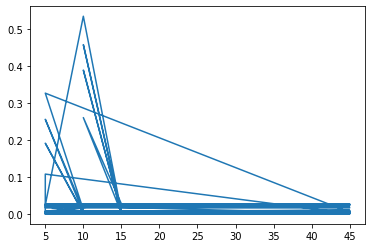

In [15]:
sub = df[df['area_irr_proj'] > 0]
plt.plot(sub['phase_ang'], sub['area_ratio_irr_star'])

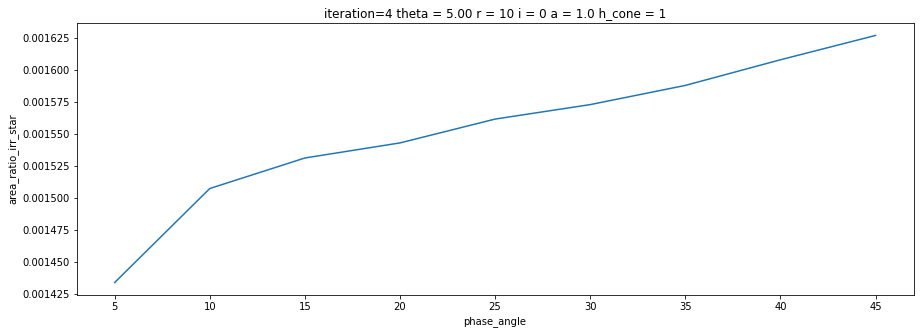

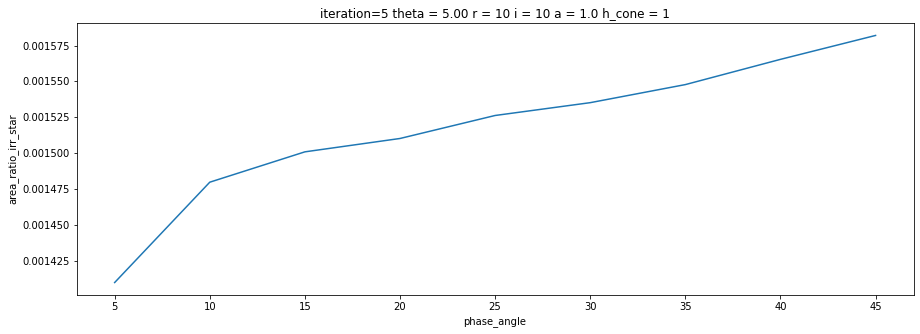

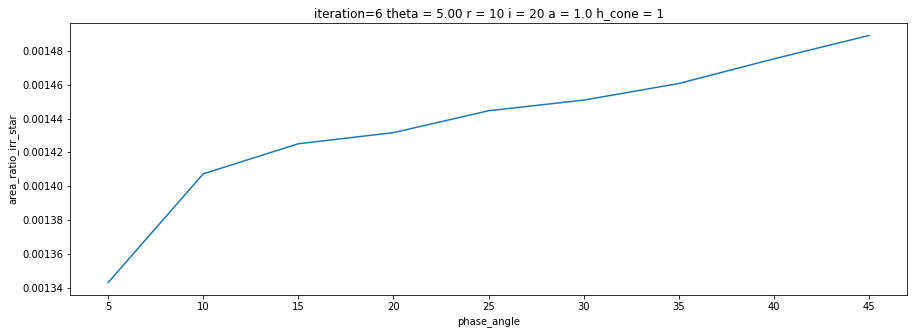

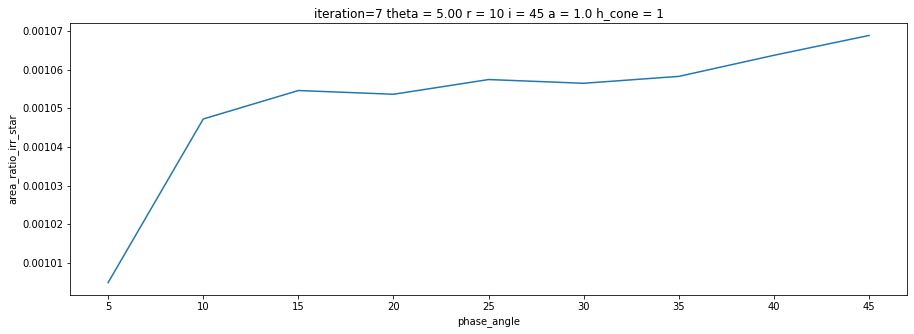

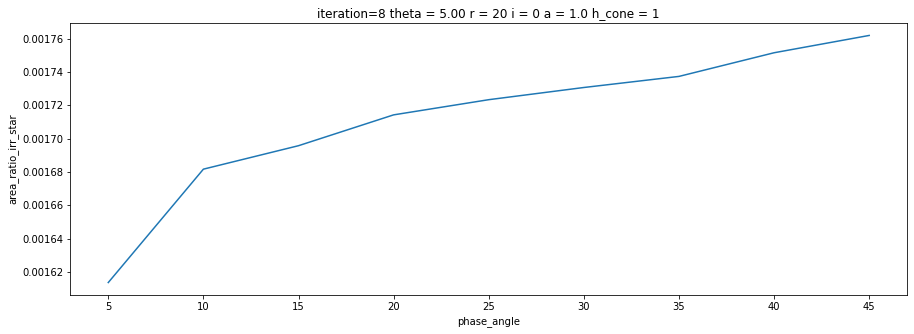

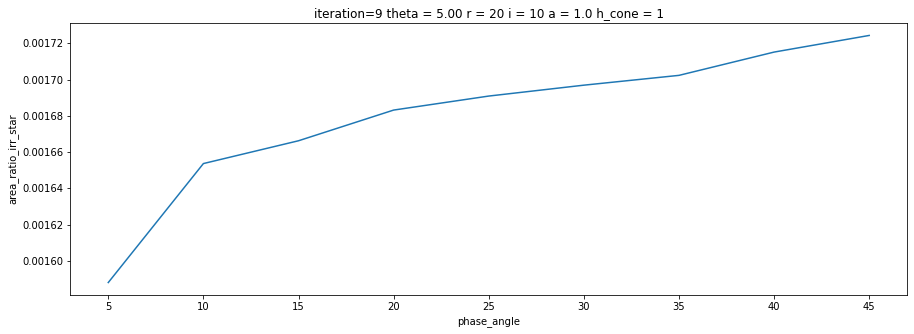

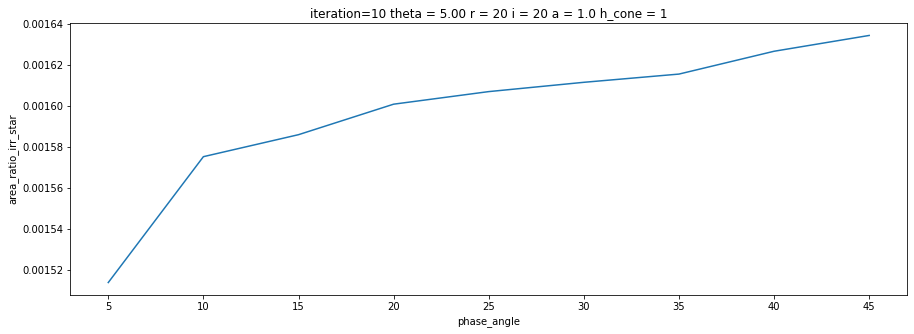

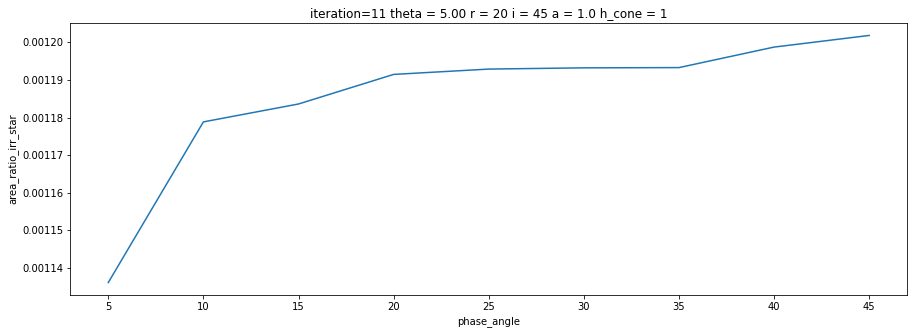

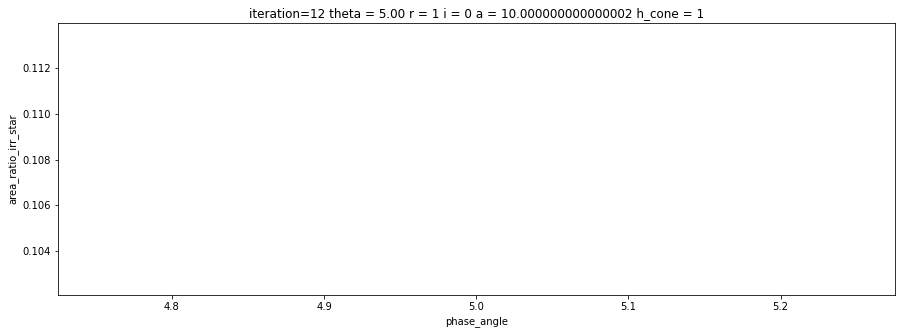

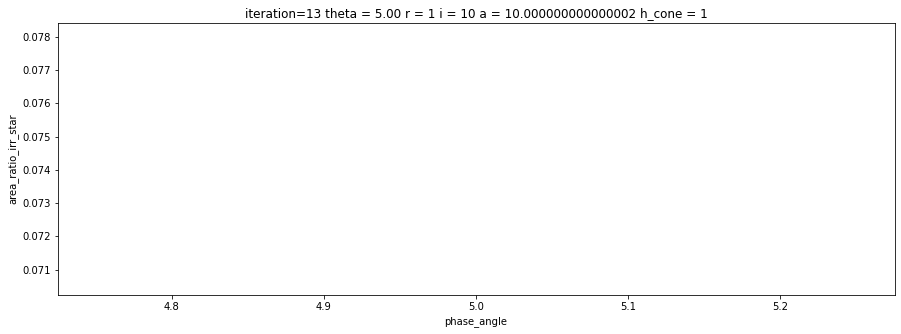

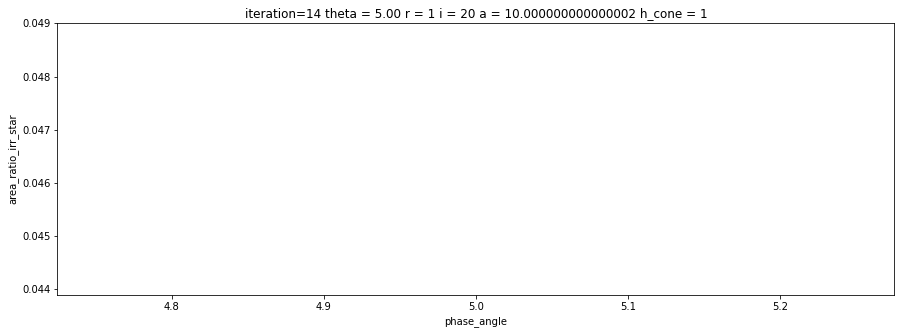

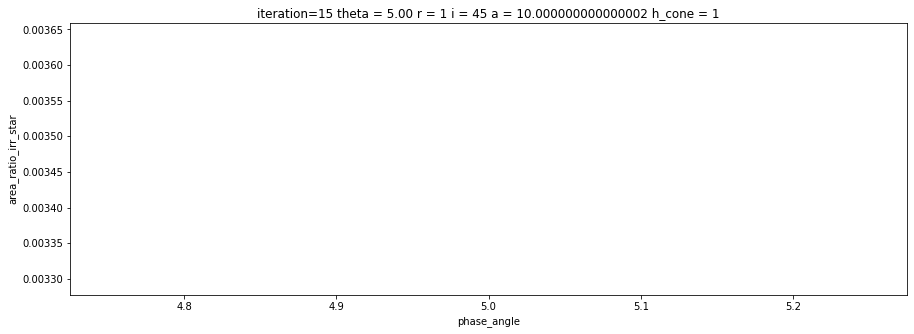

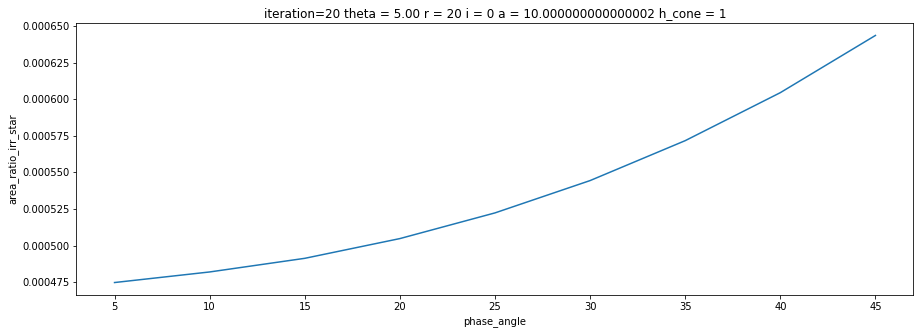

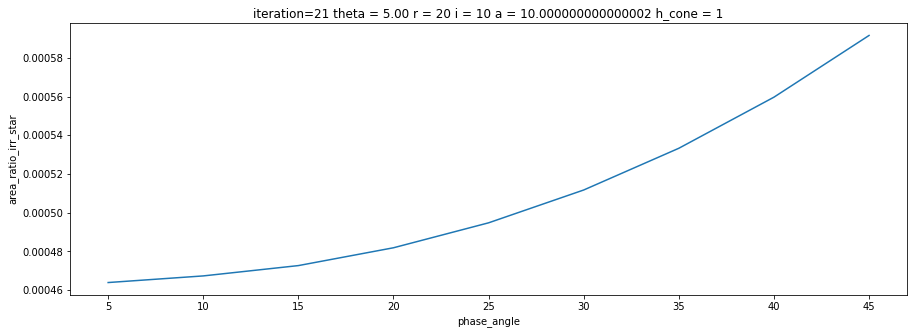

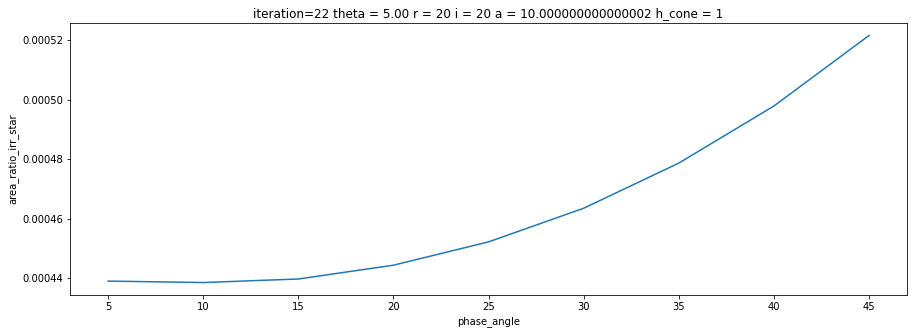

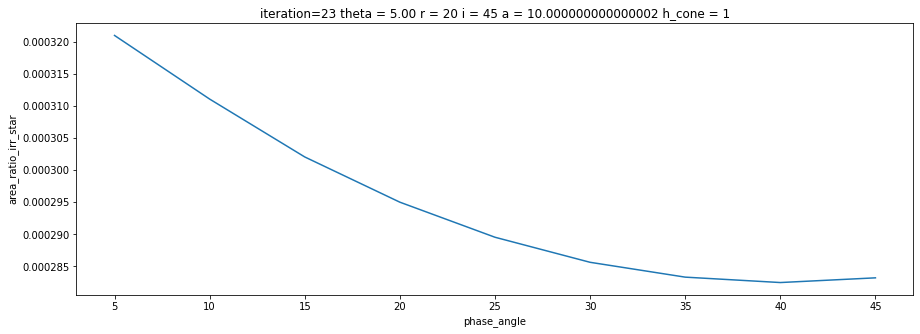

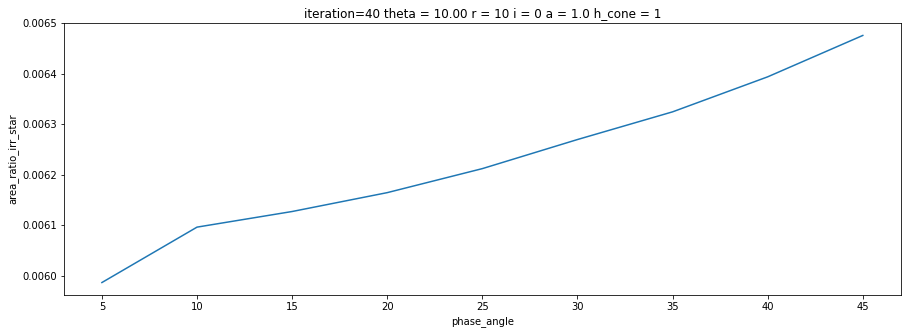

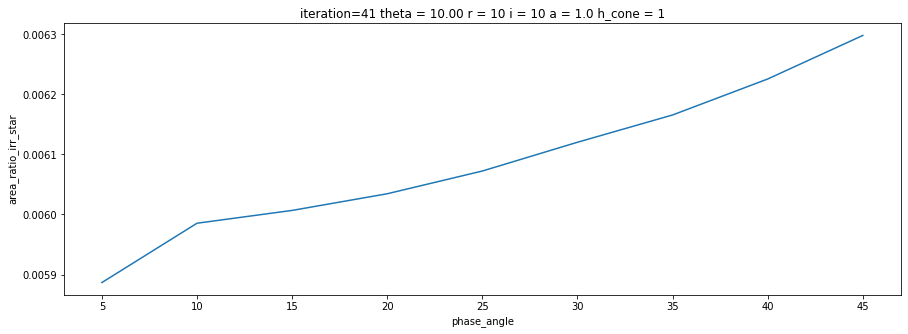

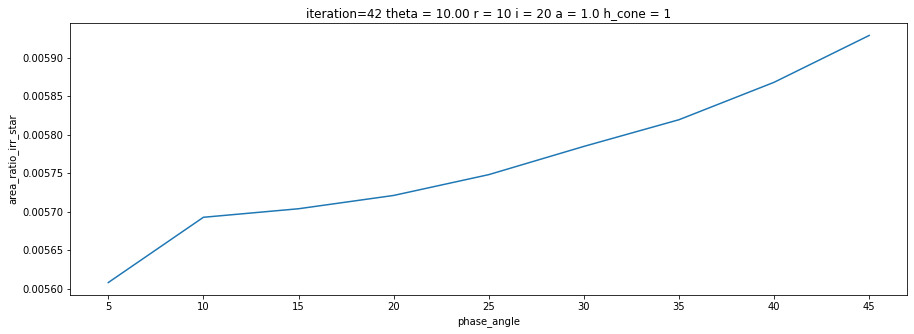

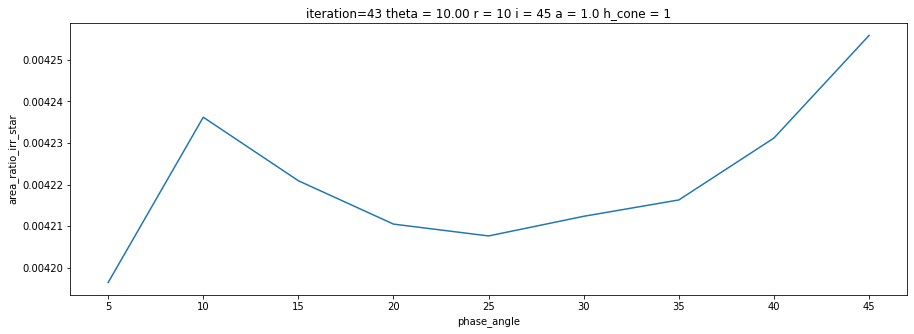

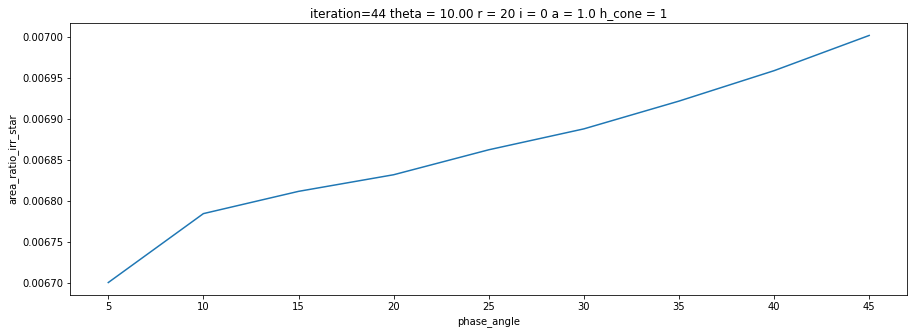

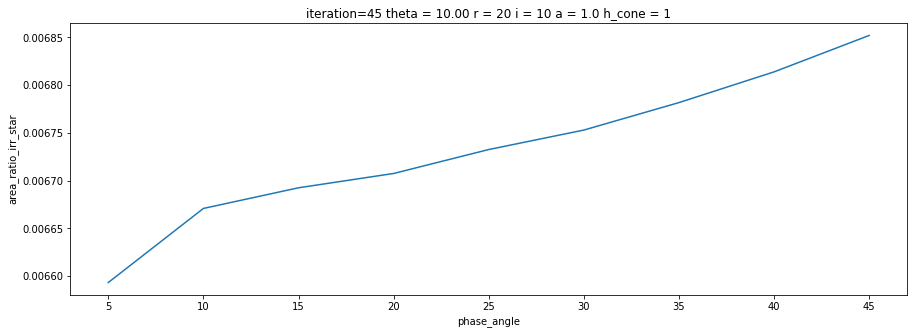

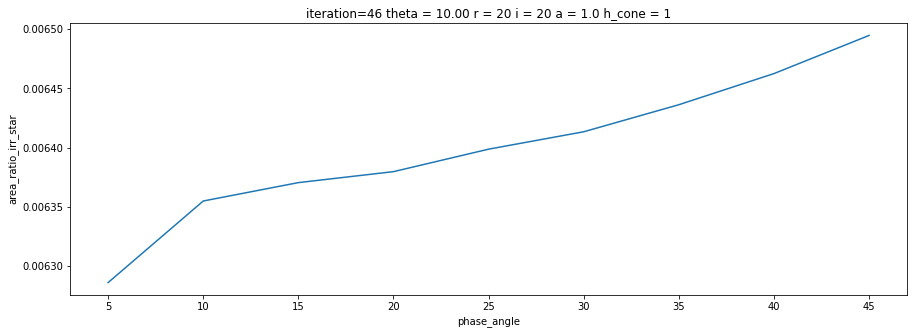

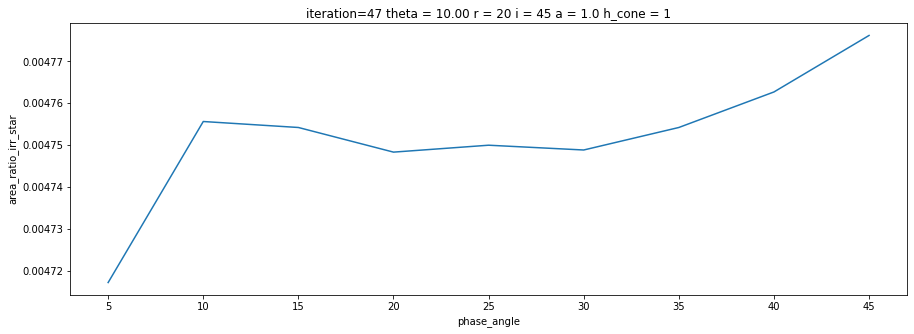

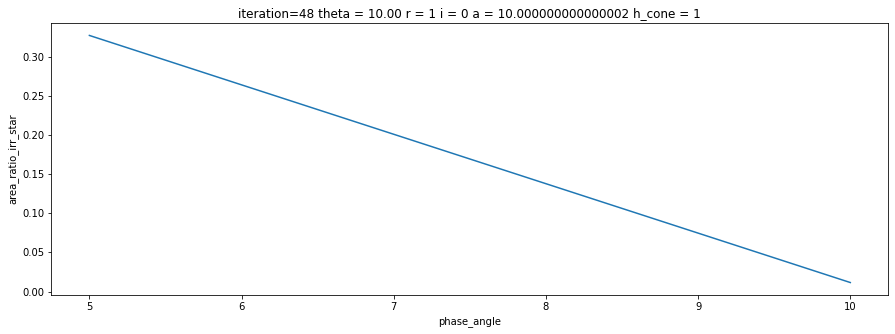

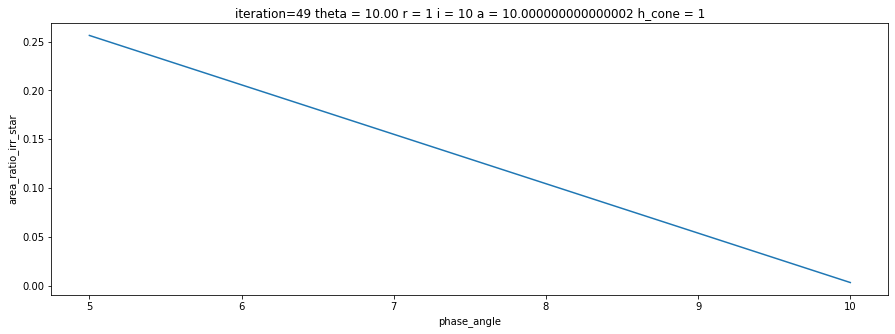

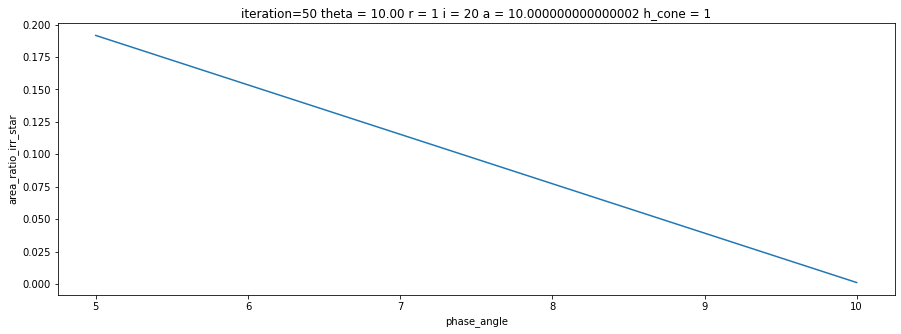

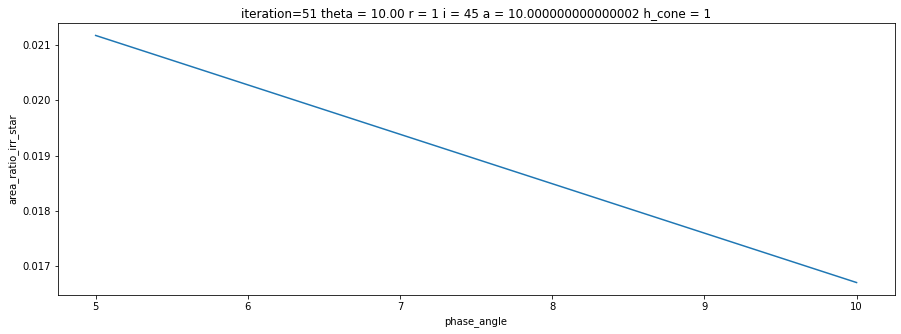

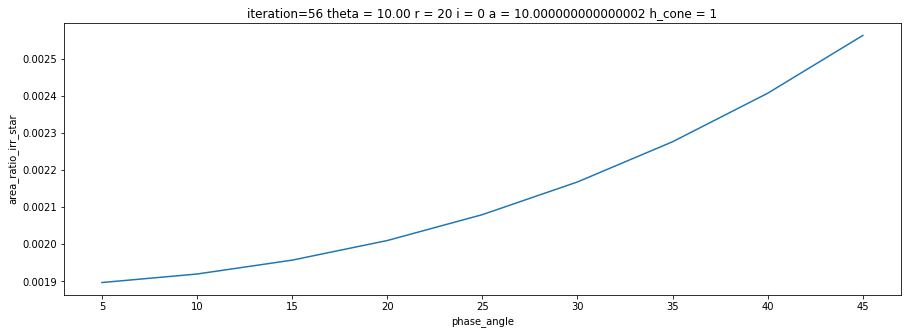

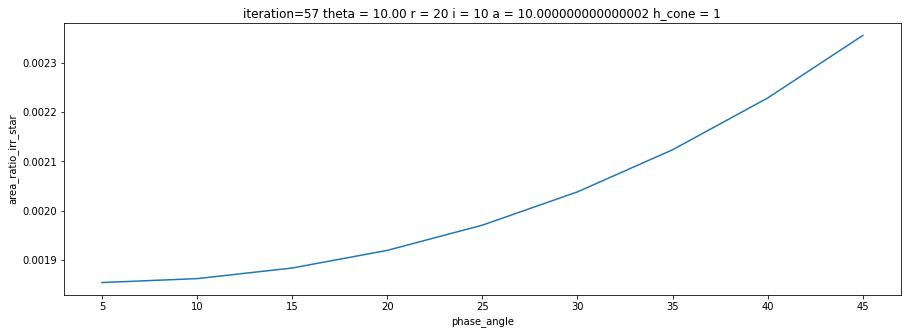

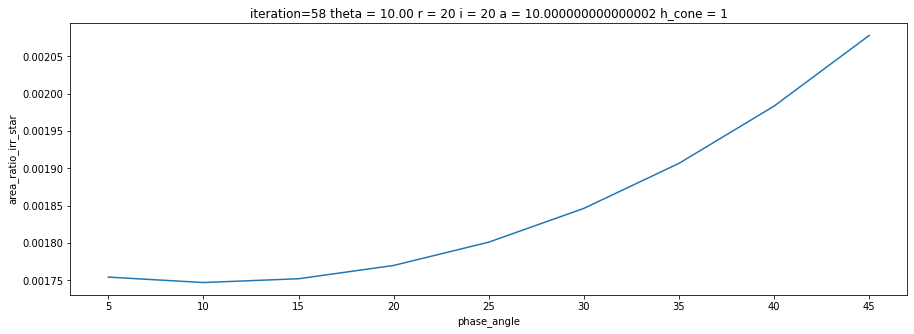

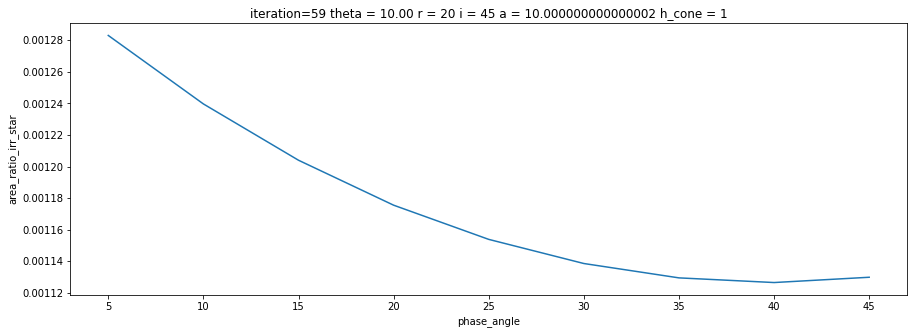

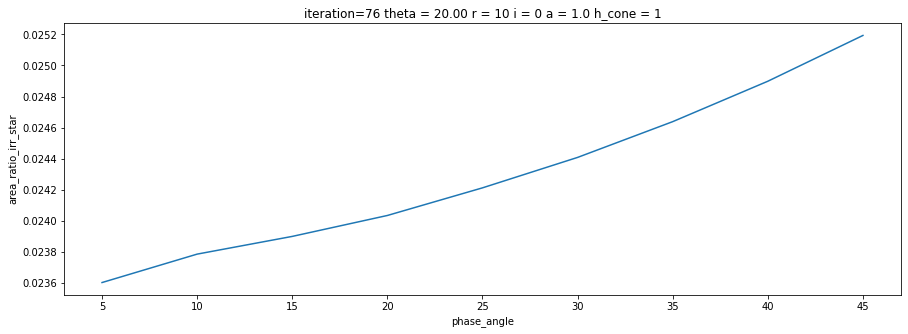

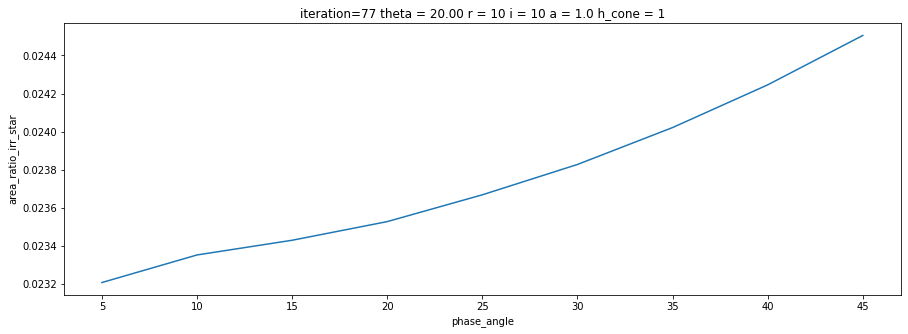

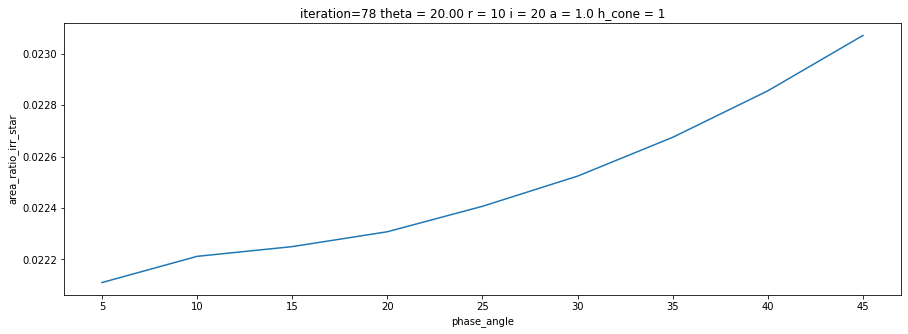

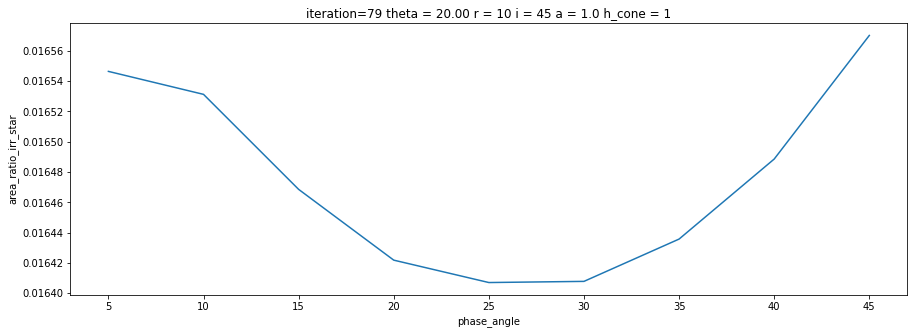

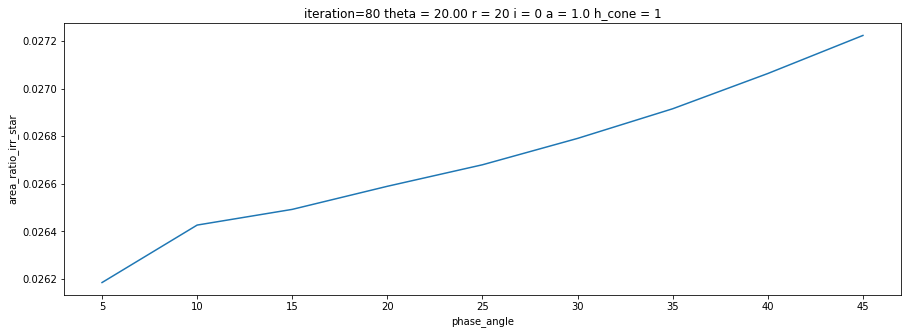

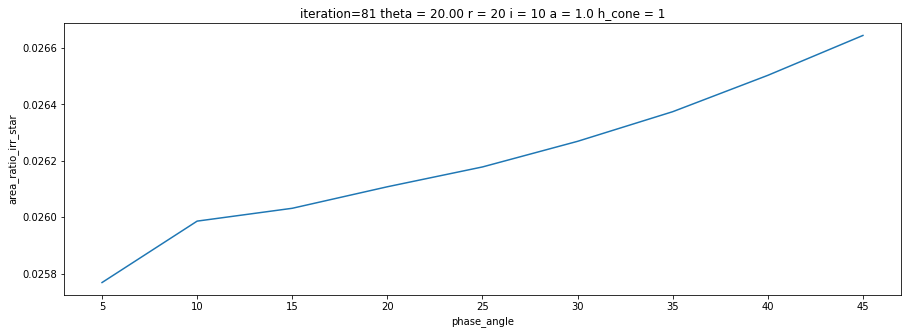

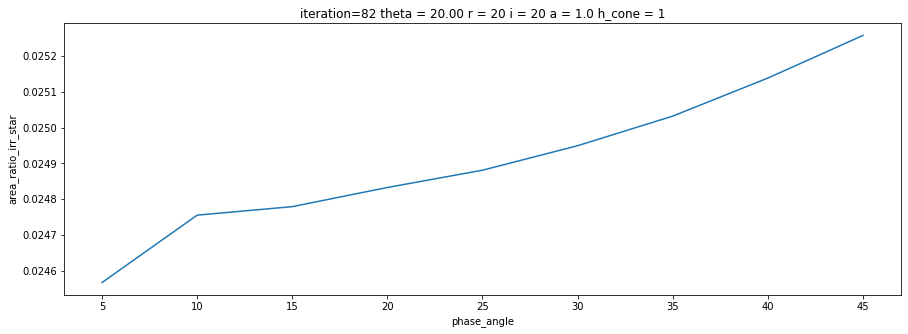

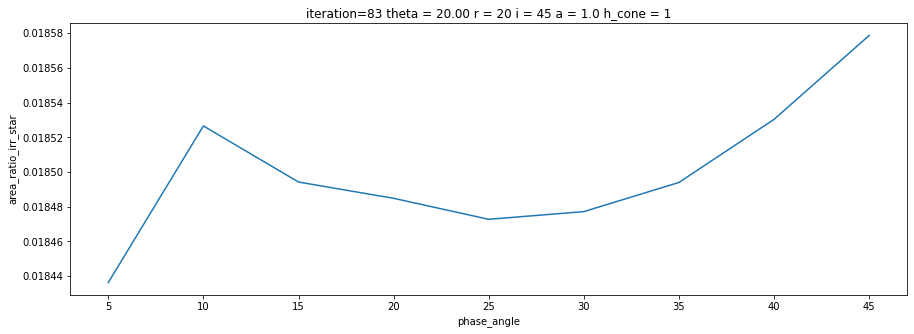

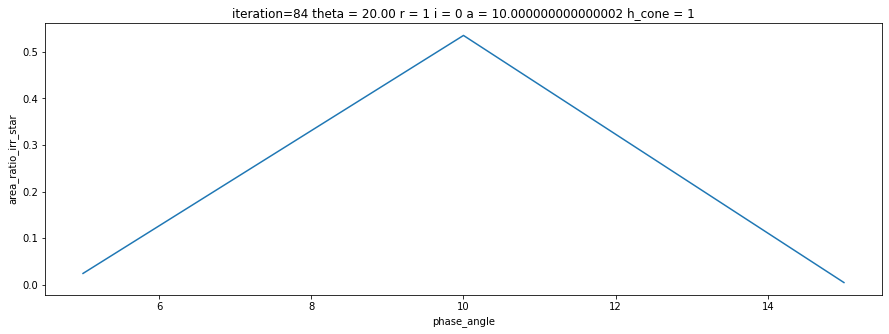

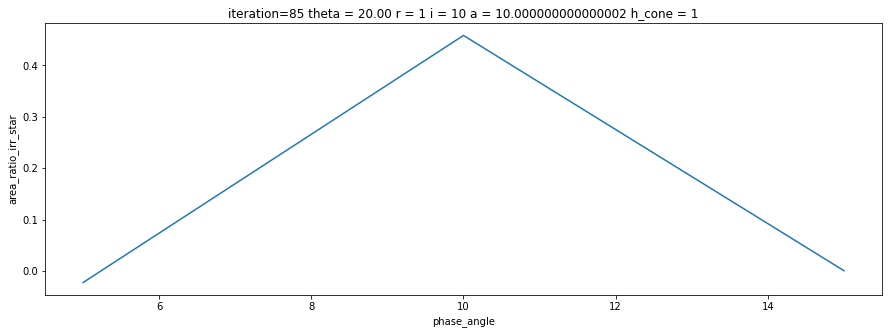

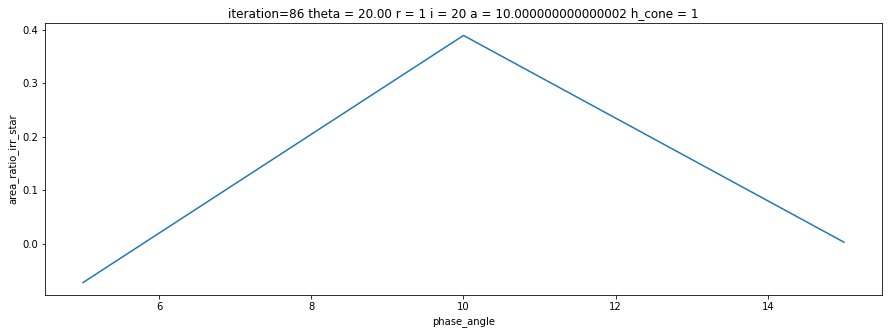

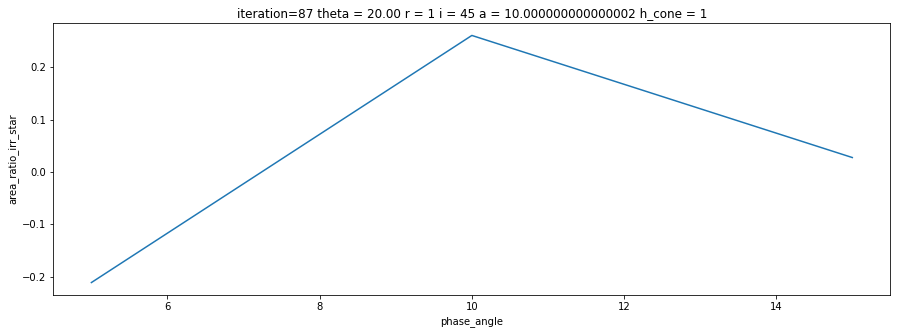

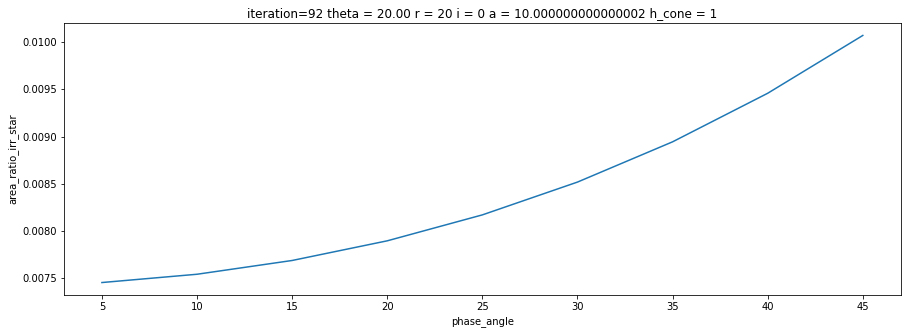

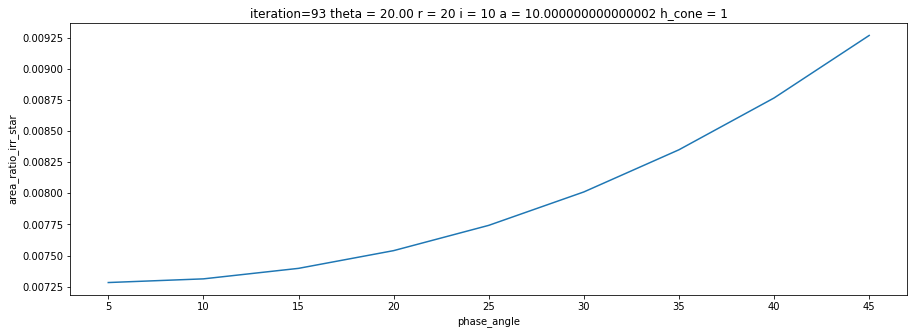

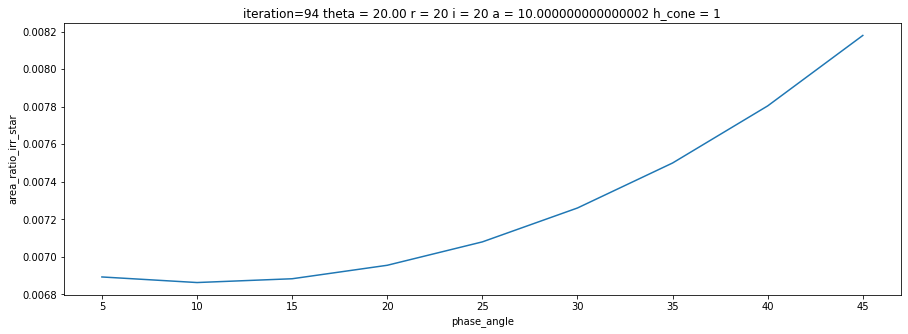

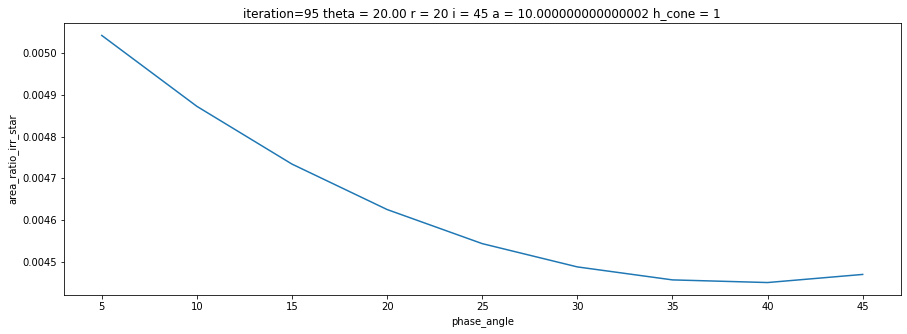

In [8]:

sub = df[df['area_ratio_irr_star'] <= 1]
for i in range(145):
    sub2   = sub[sub['iteration'] == i]
    try:
        theta  = sub2['theta'].unique()[0]
        r      = sub2['r'].unique()[0]
        incl   = sub2['i'].unique()[0]
        a      = sub2['a'].unique()[0]
        h_cone = sub['h_cone'].unique()[0]
    except:
        continue
    
    plt.figure(figsize=(15,5))
    plt.title(f'iteration={i} theta = {np.rad2deg(theta):.2f} r = {r} i = {incl} a = {a} h_cone = {h_cone}')
    plt.plot(sub2['phase_ang'], sub2['area_ratio_irr_star'])
    plt.xlabel('phase_angle')
    plt.ylabel('area_ratio_irr_star')
    plt.show()
    

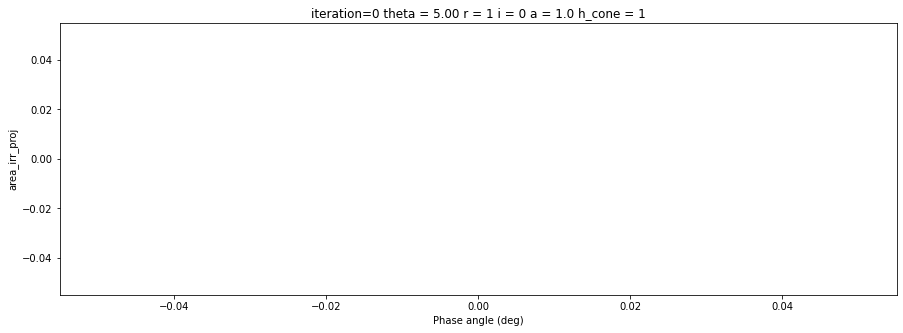

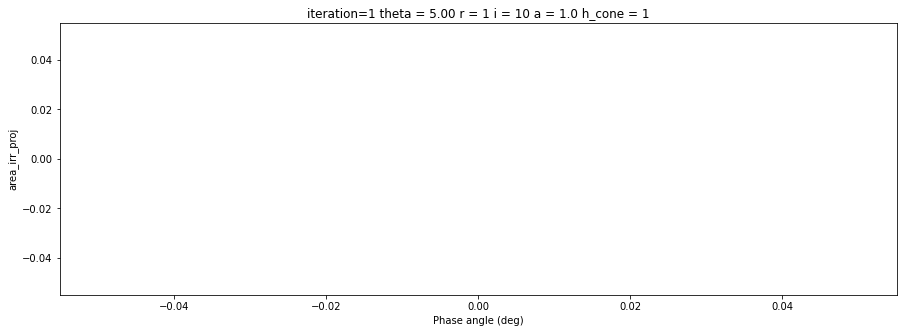

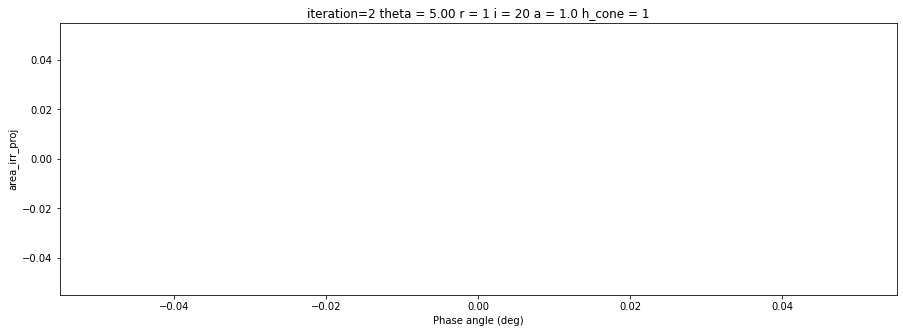

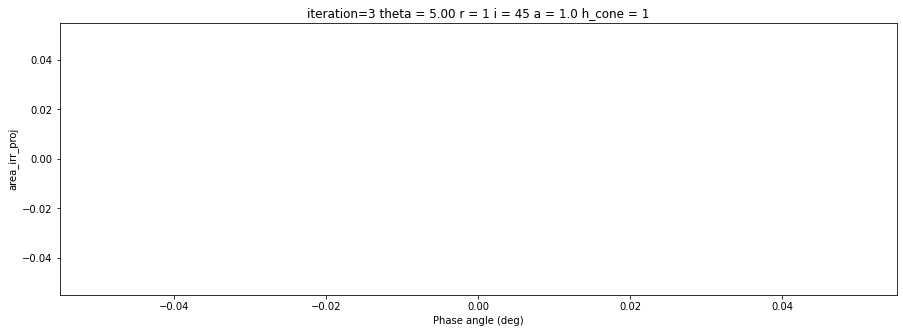

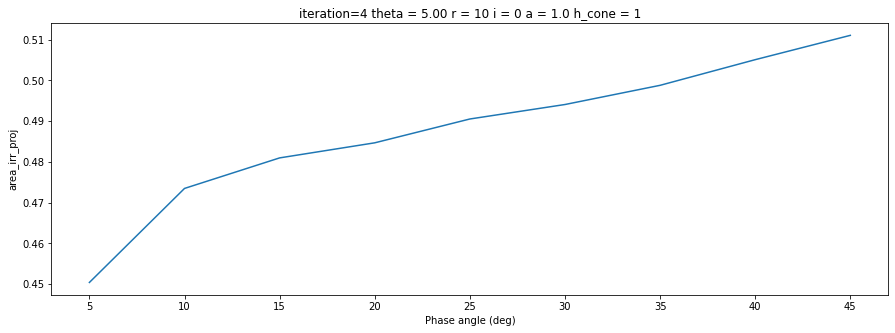

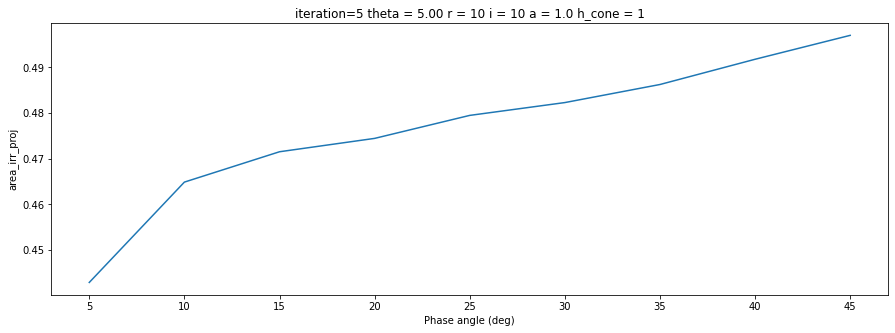

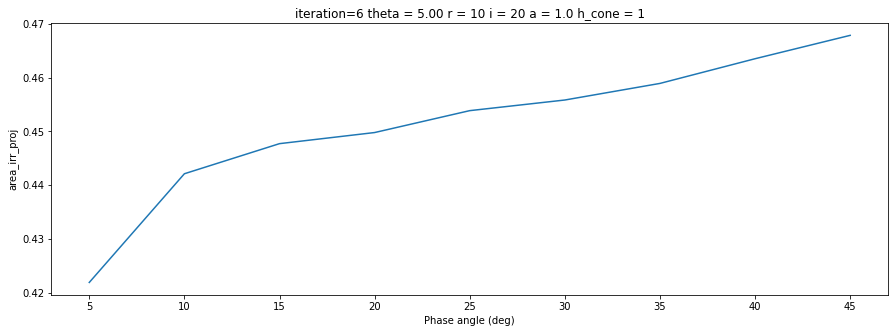

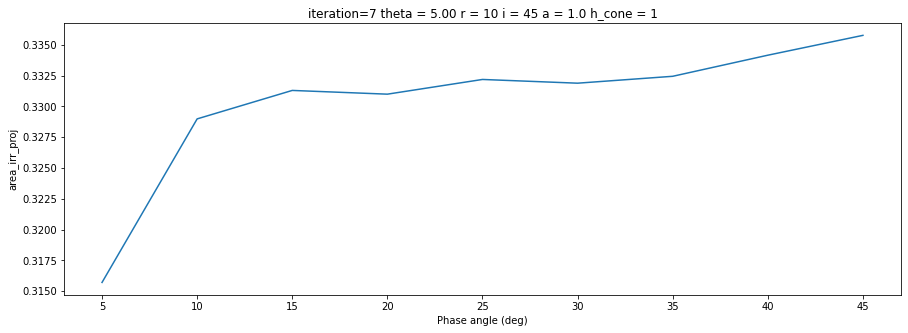

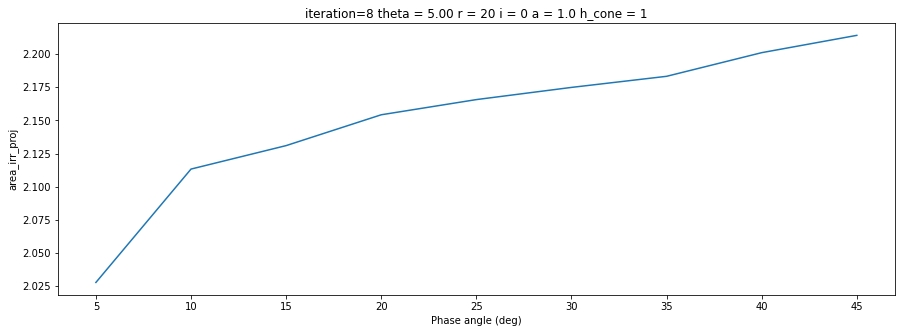

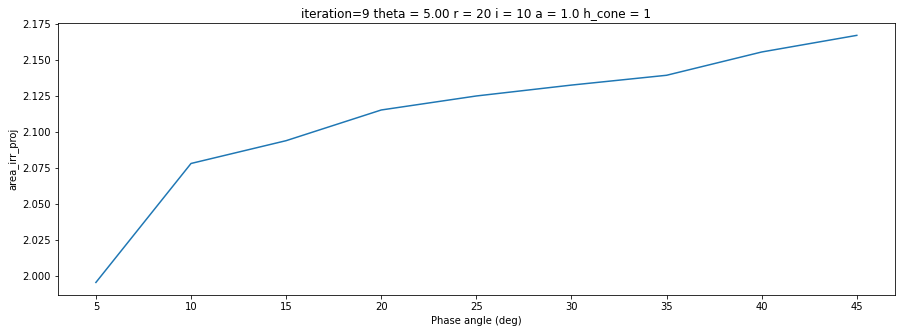

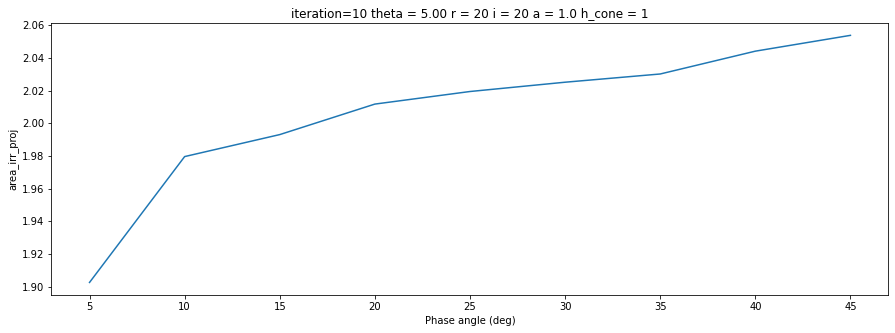

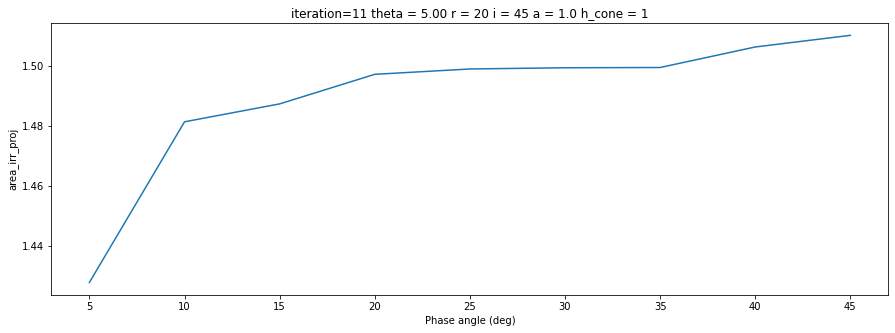

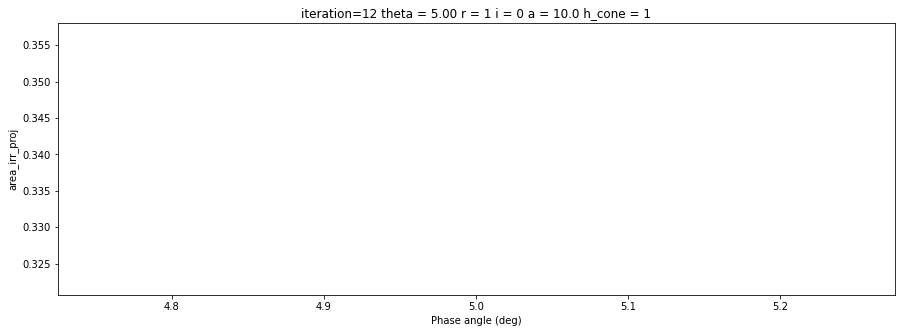

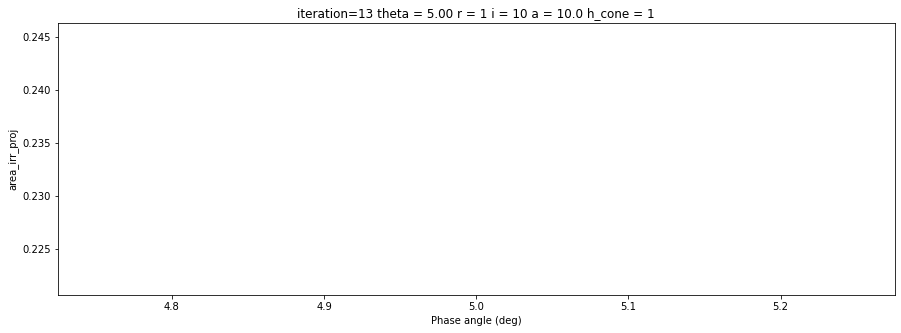

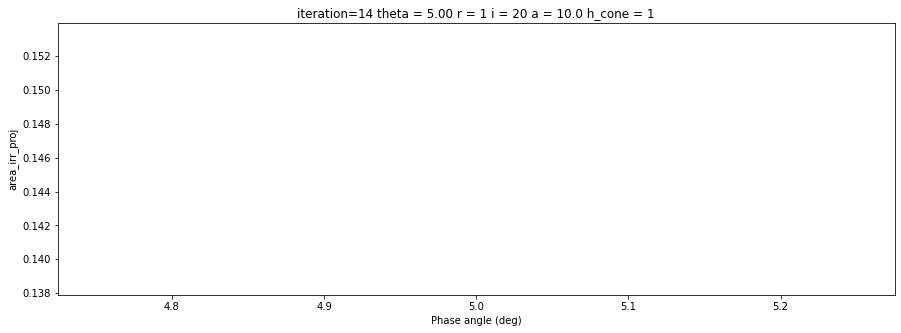

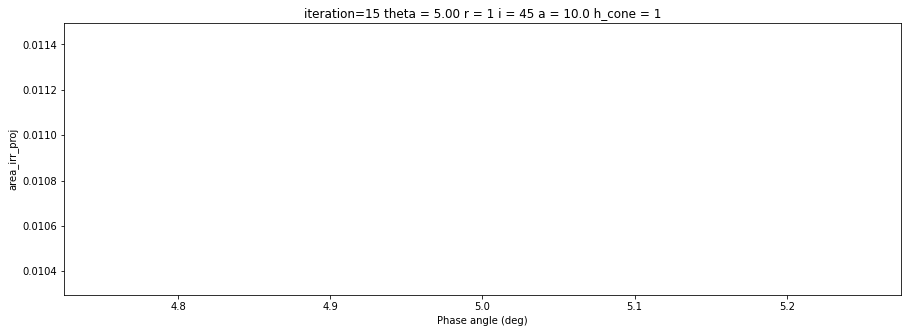

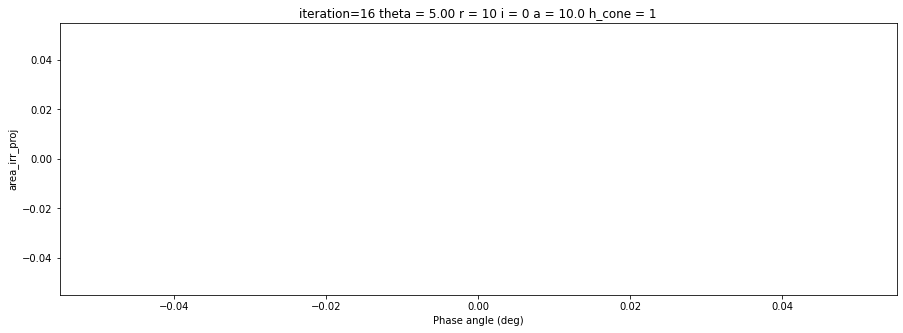

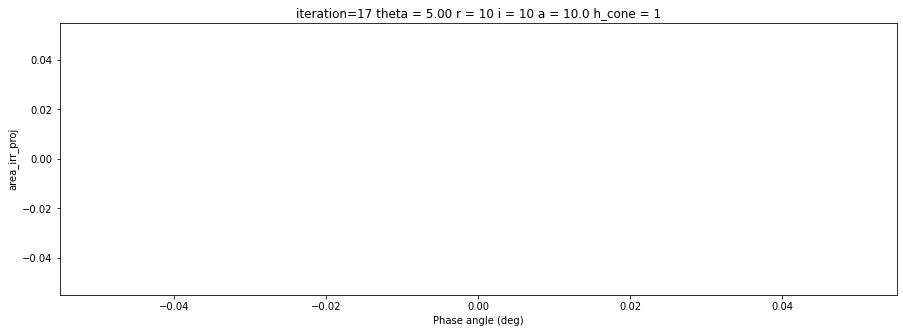

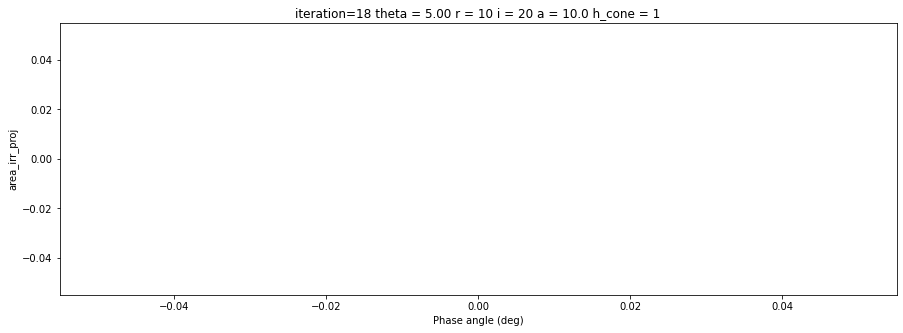

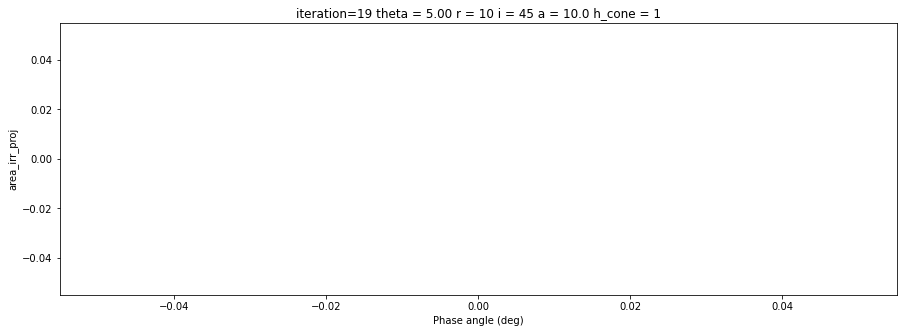

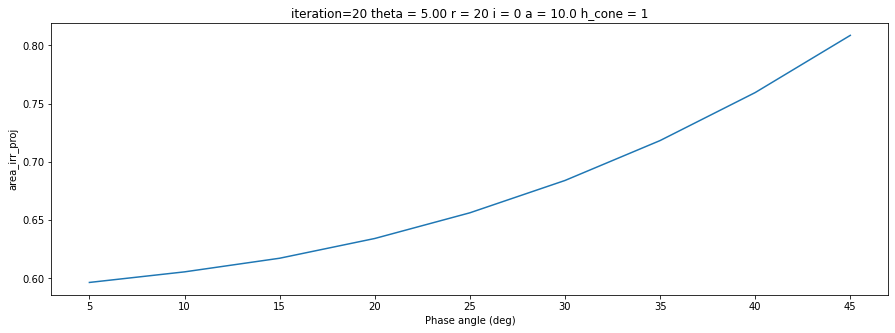

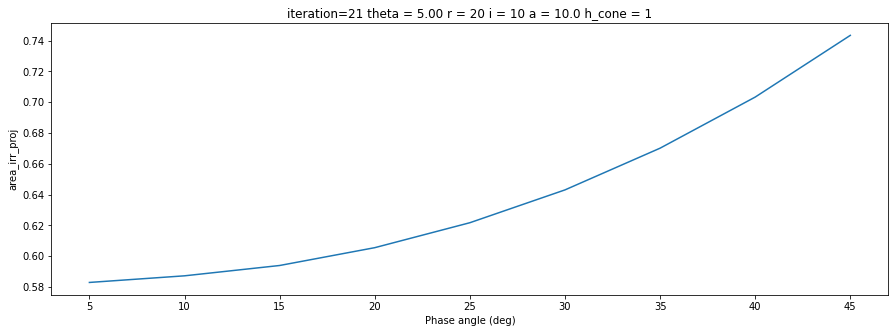

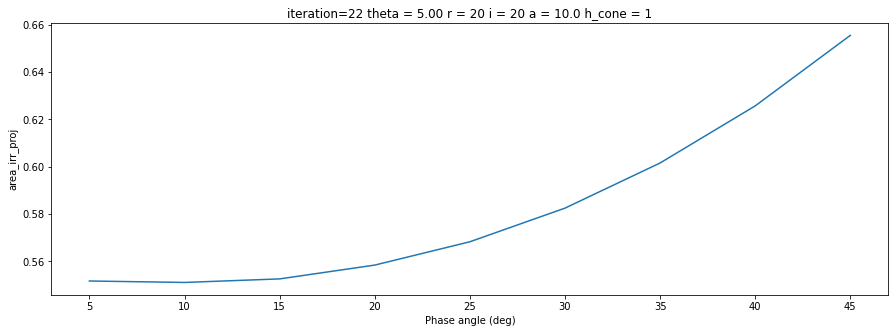

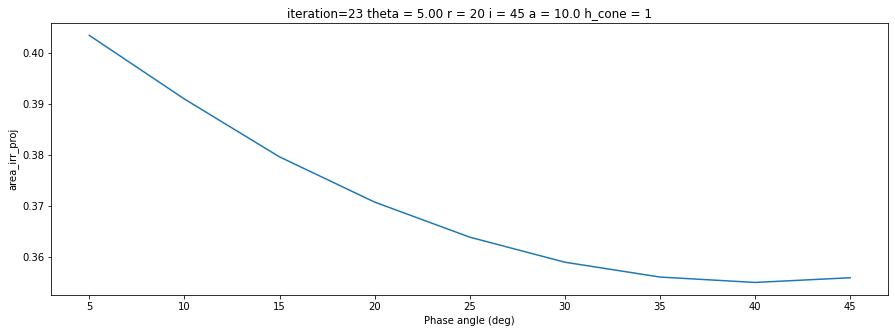

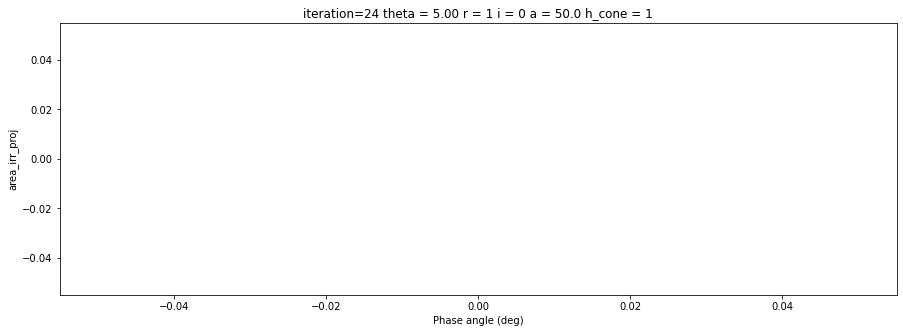

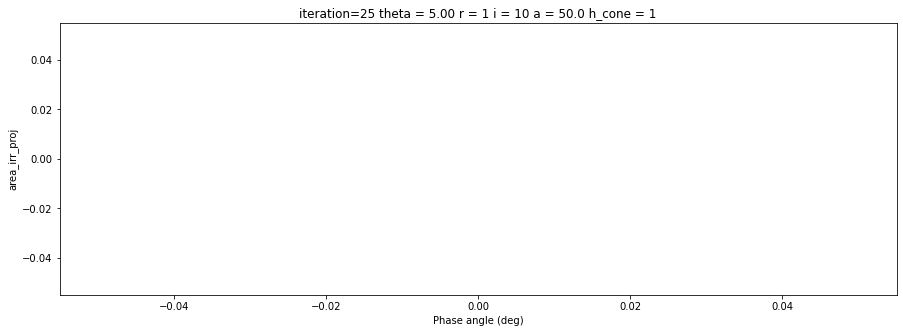

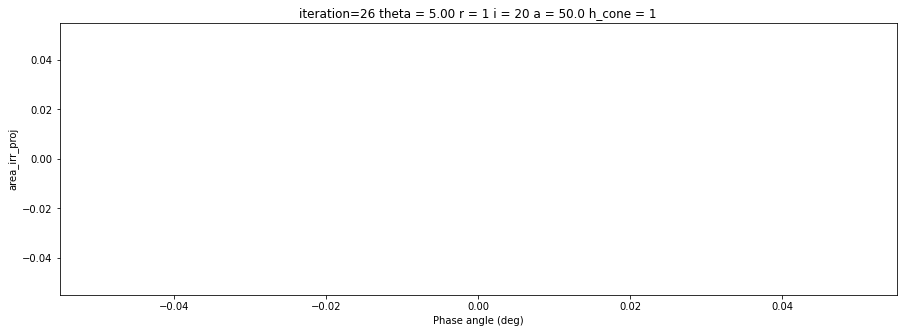

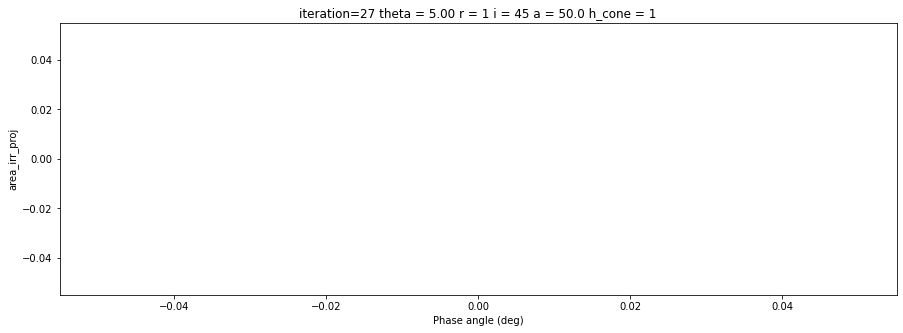

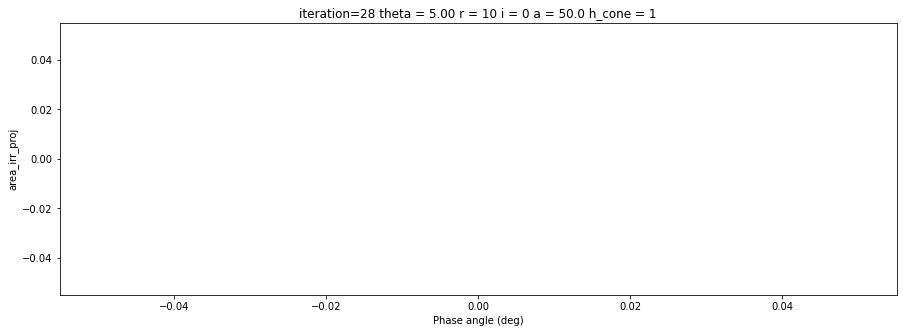

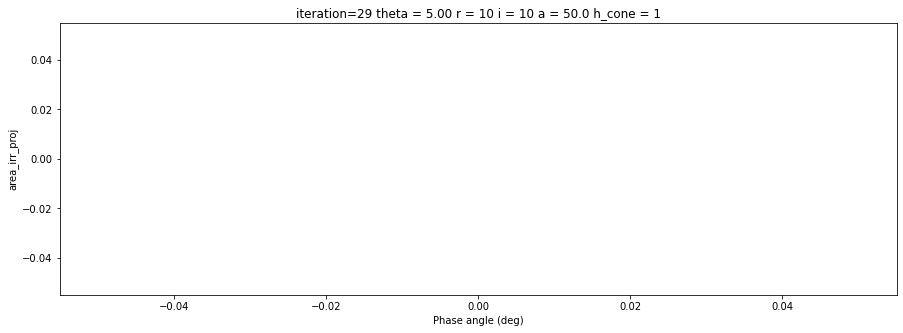

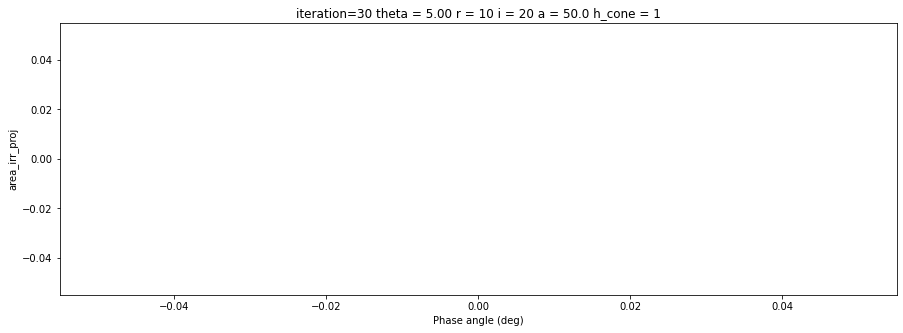

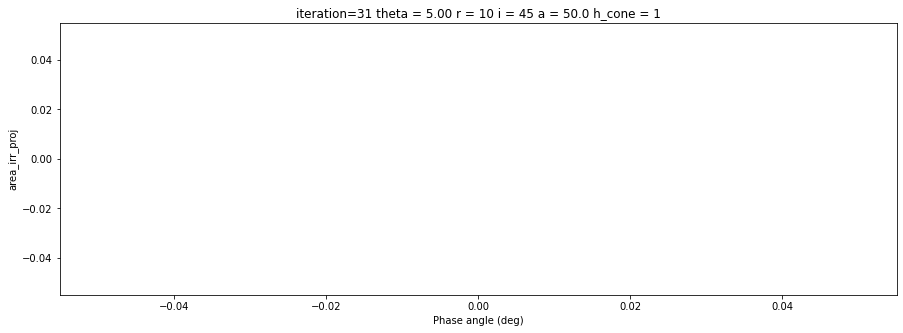

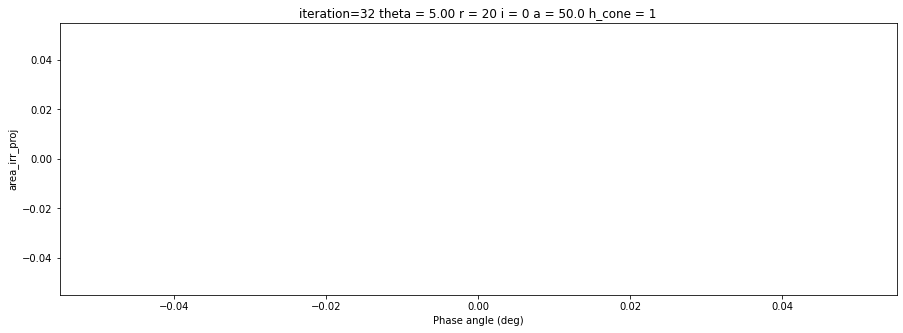

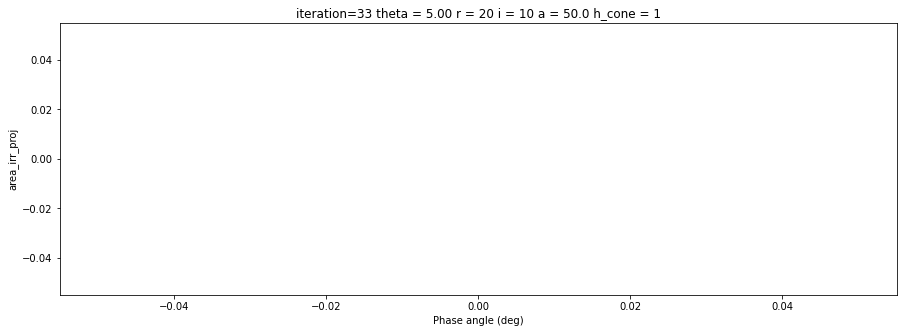

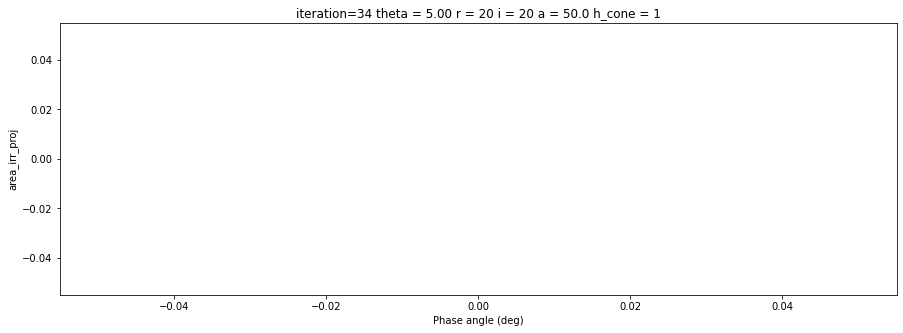

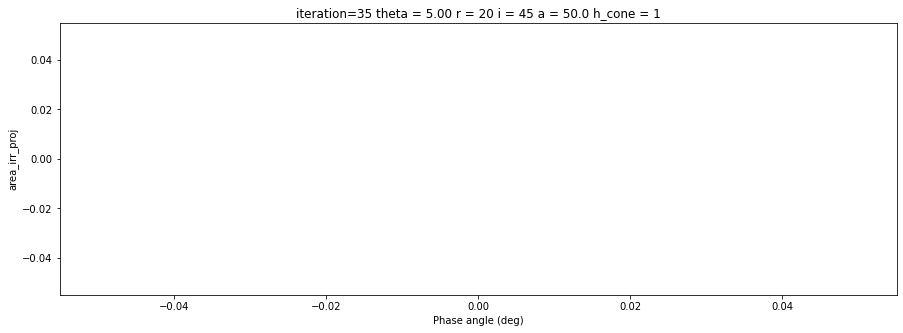

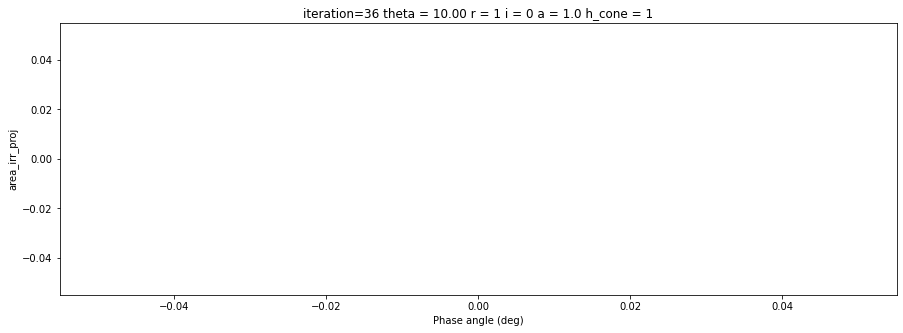

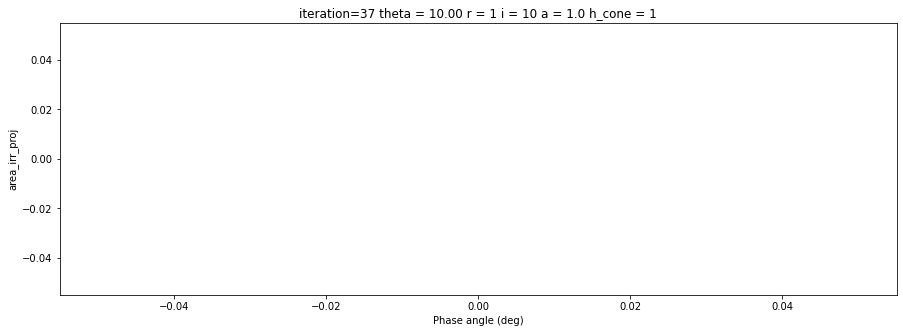

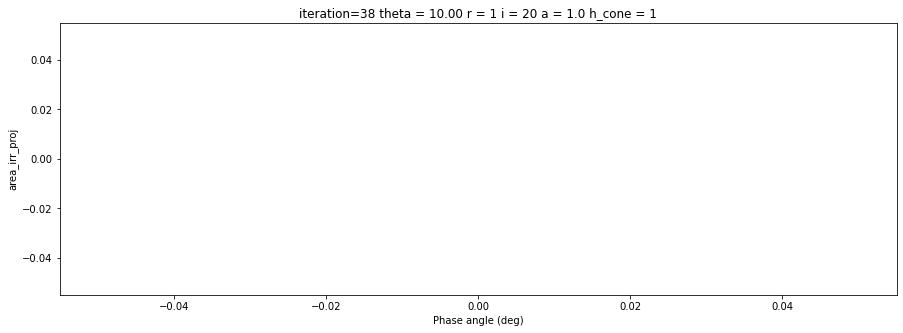

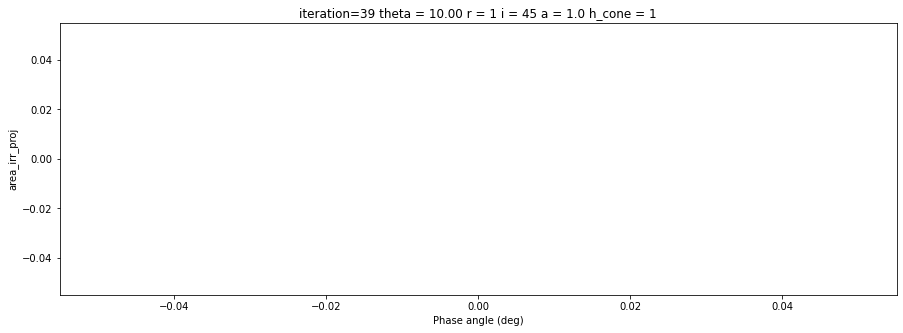

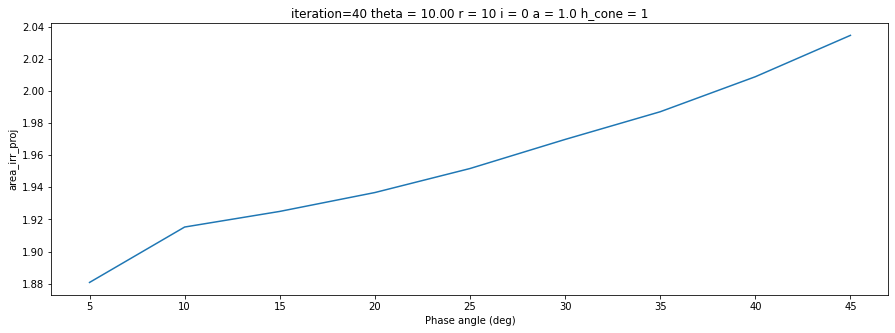

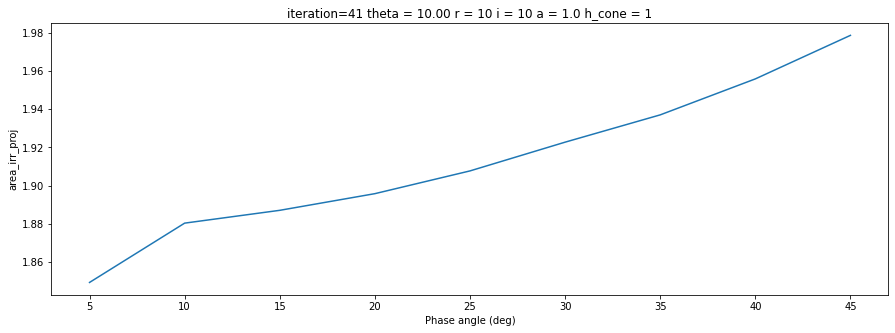

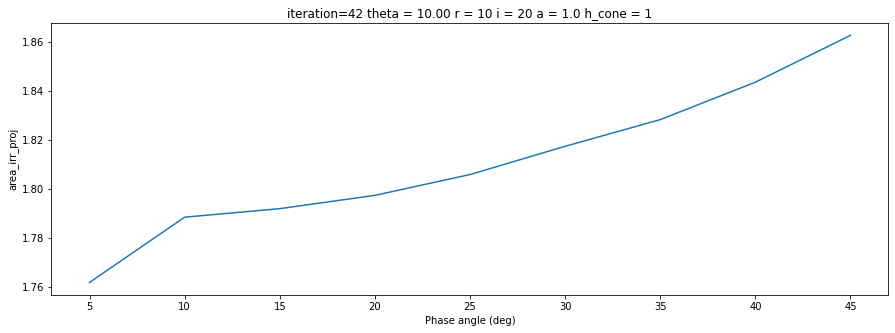

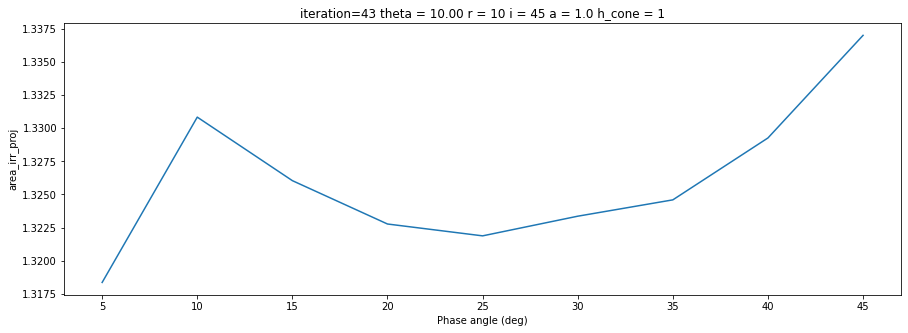

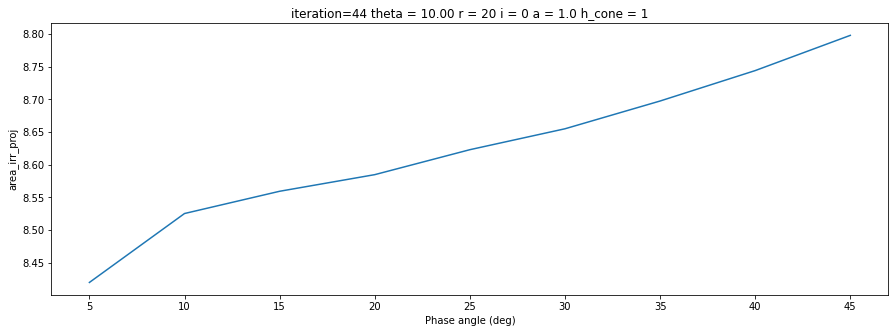

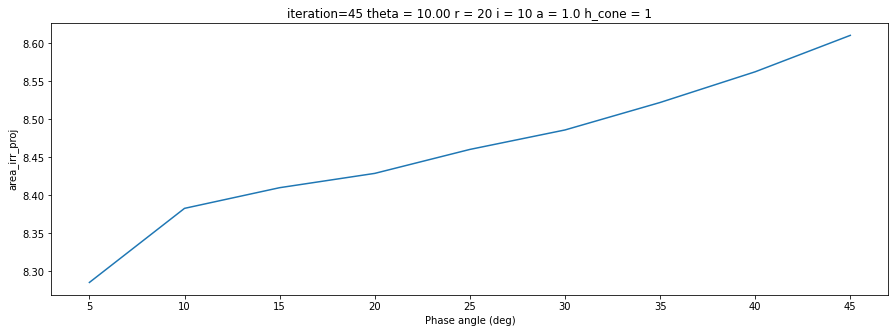

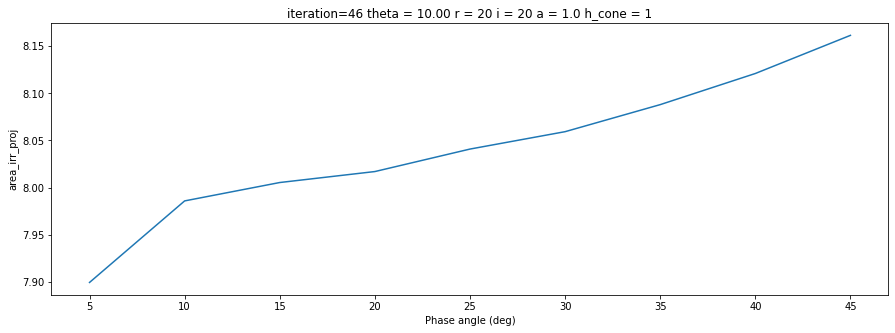

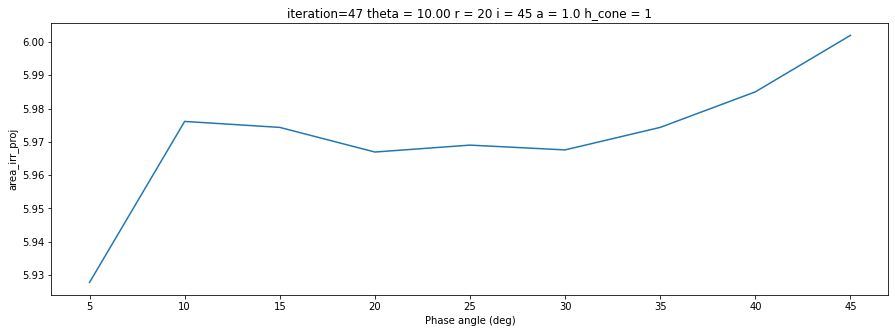

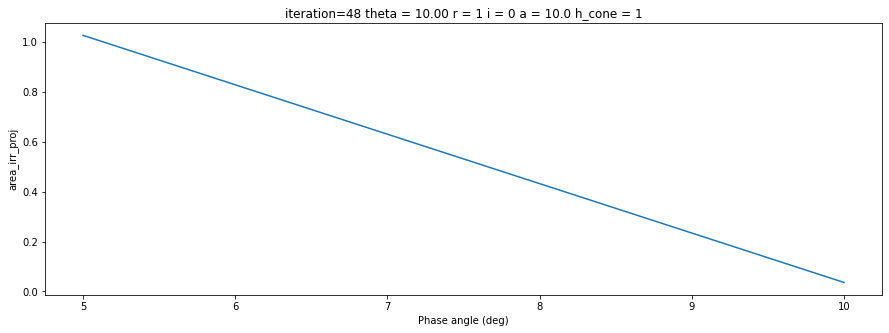

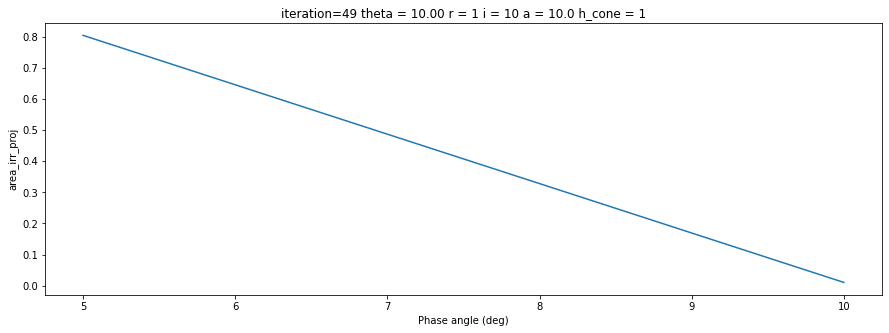

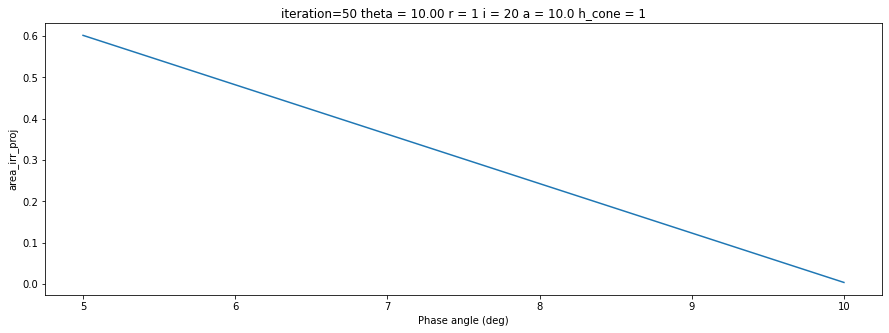

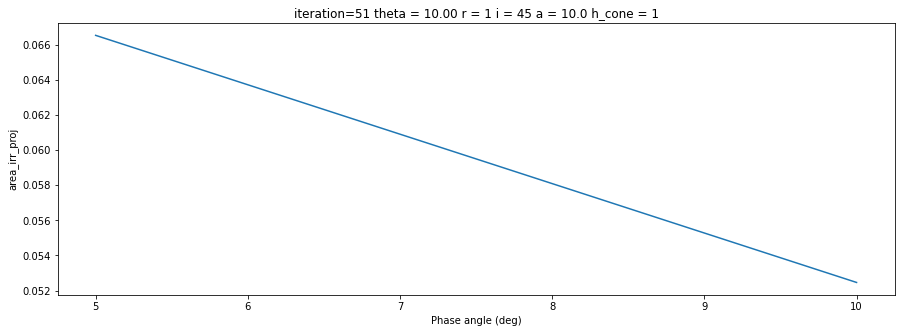

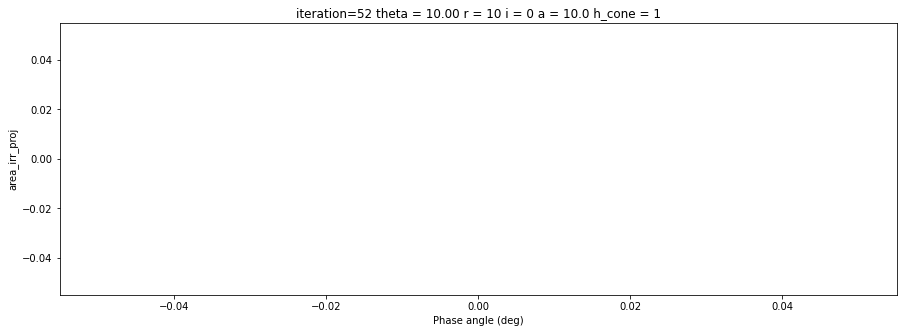

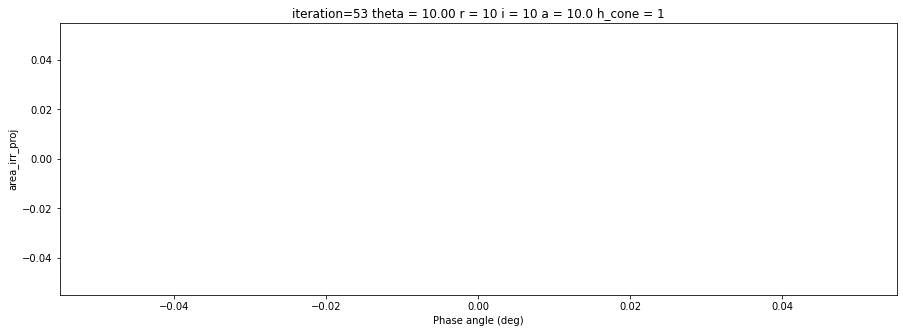

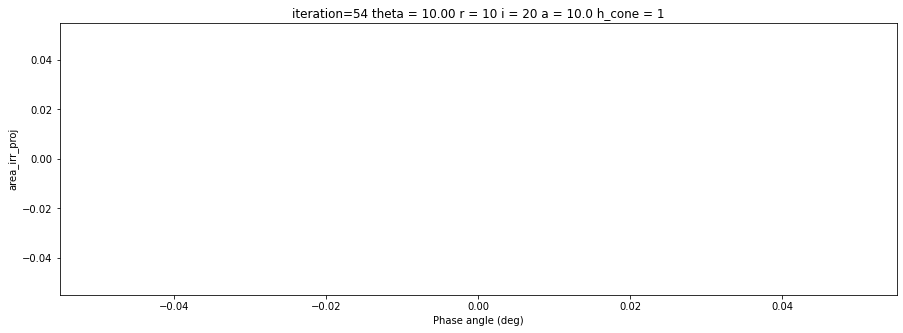

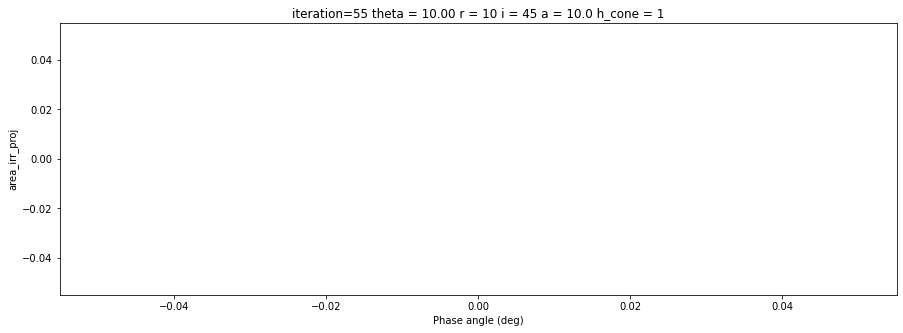

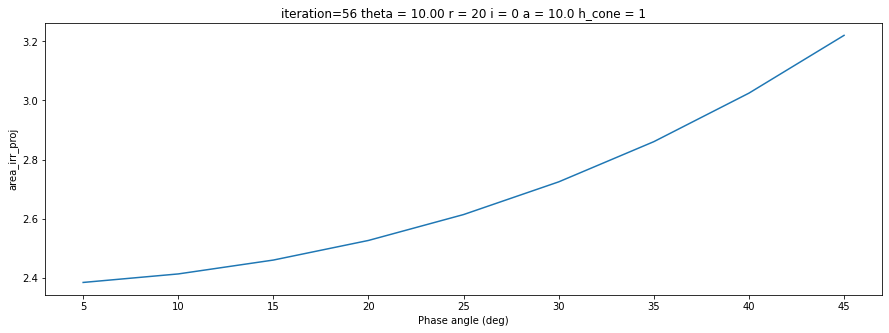

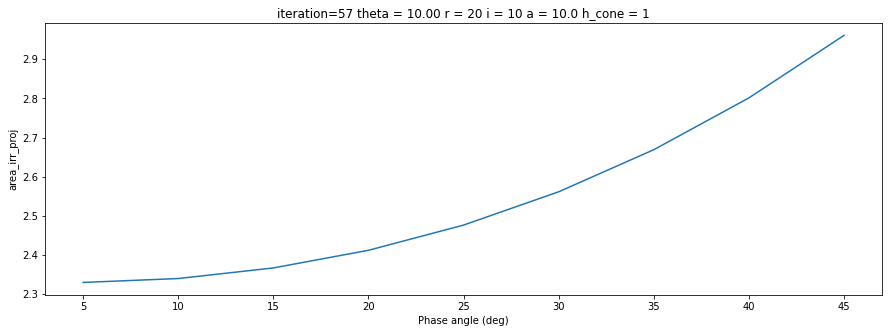

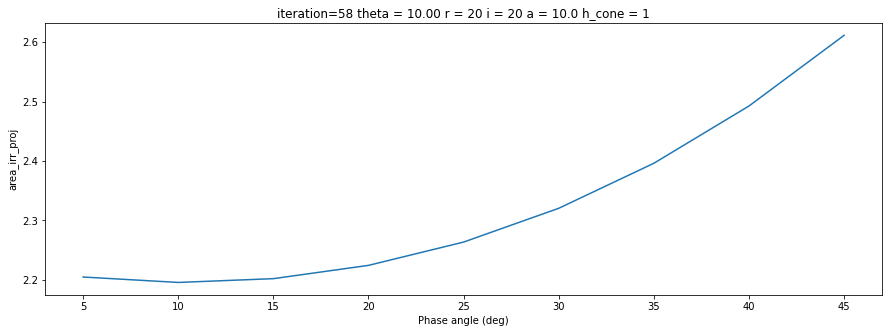

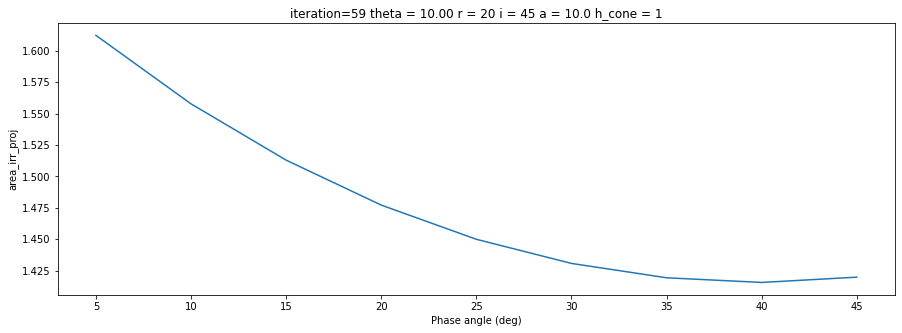

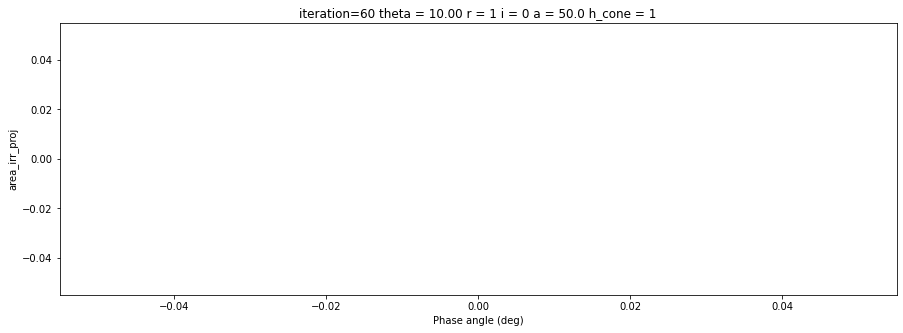

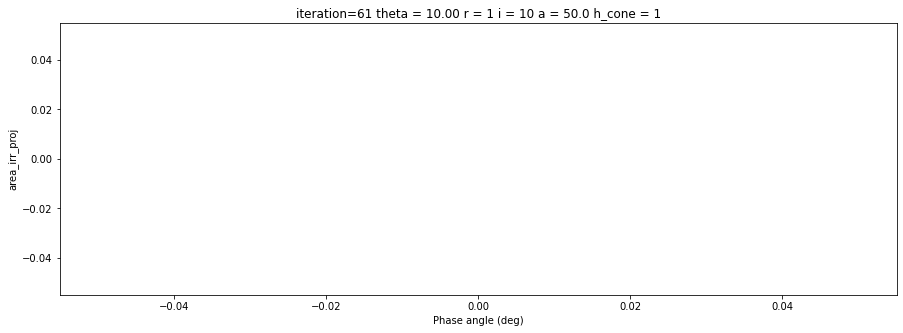

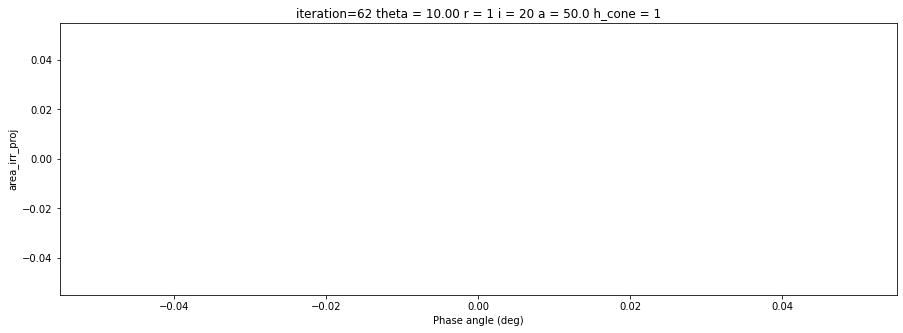

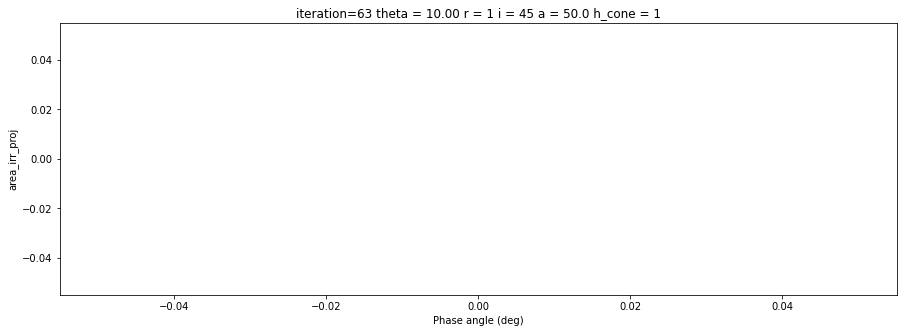

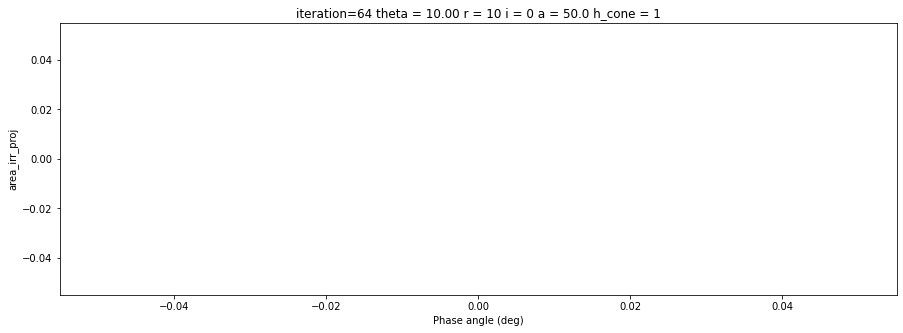

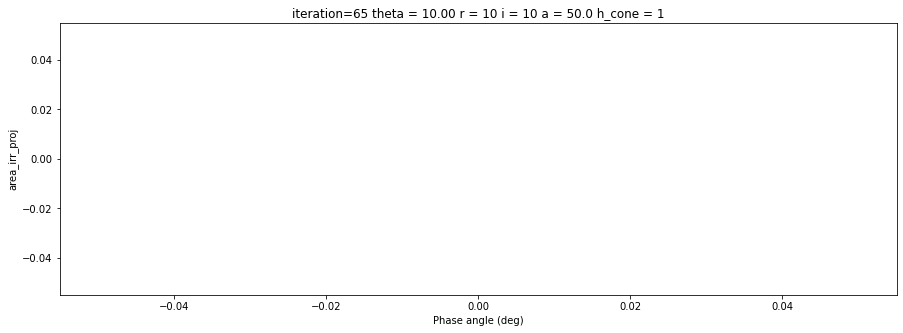

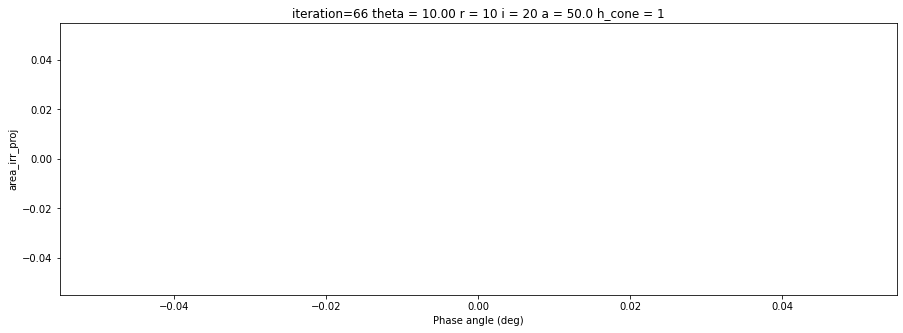

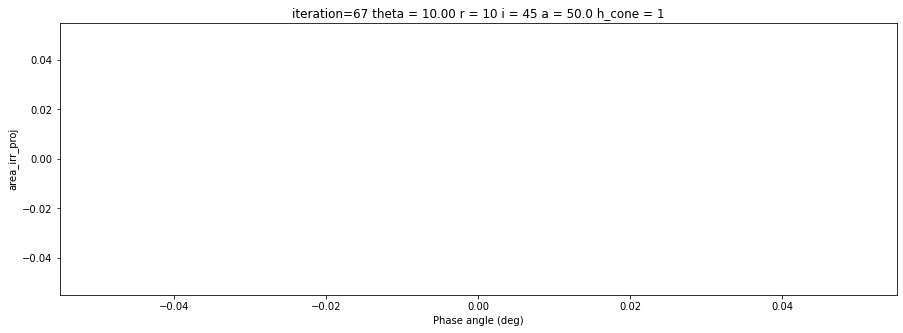

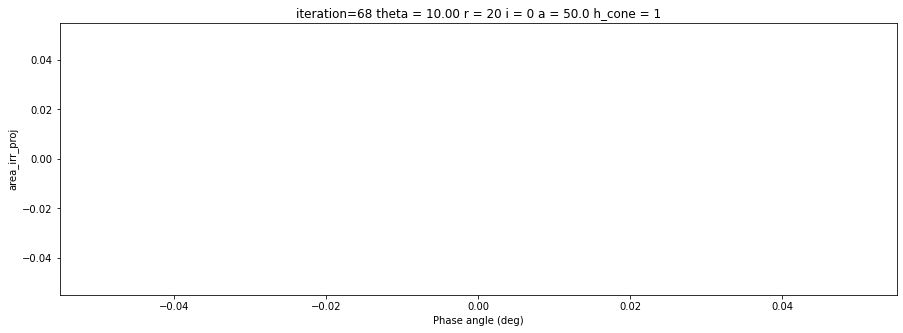

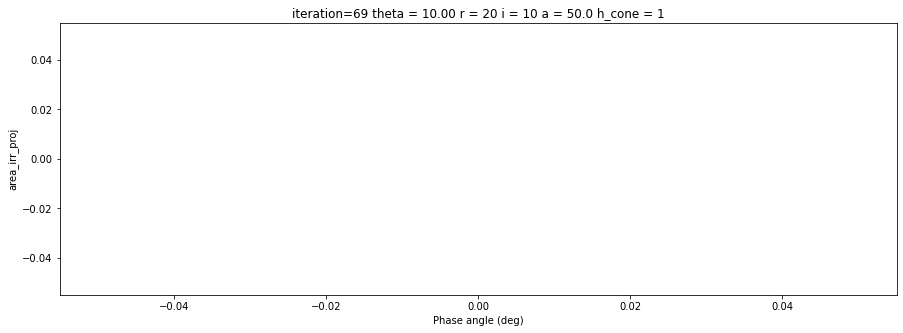

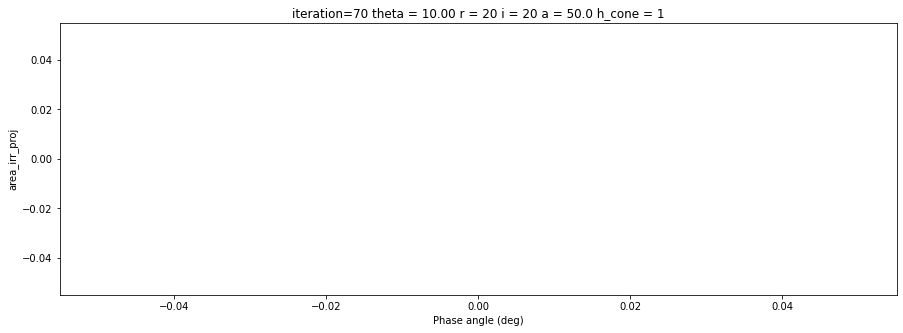

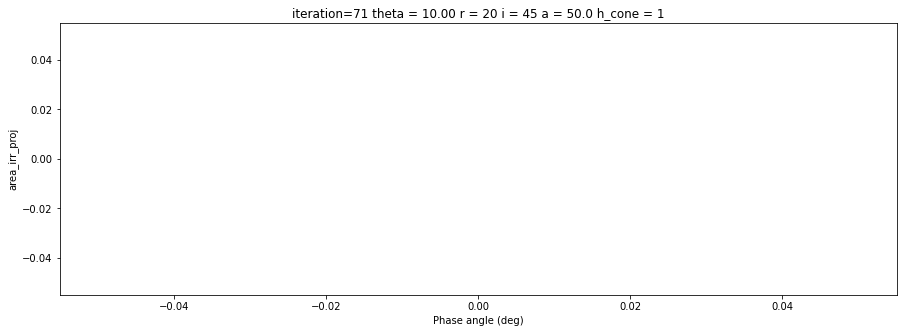

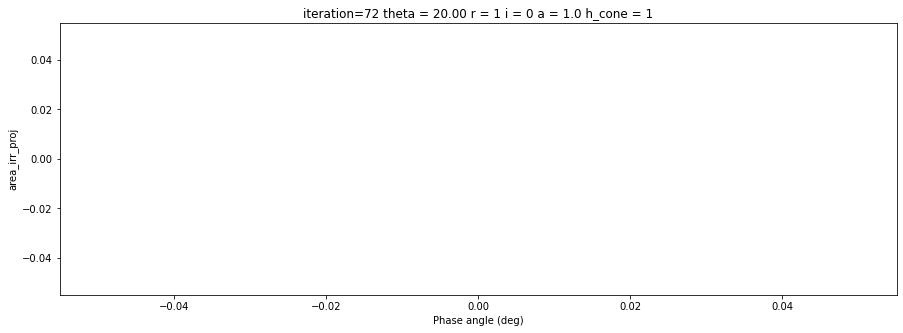

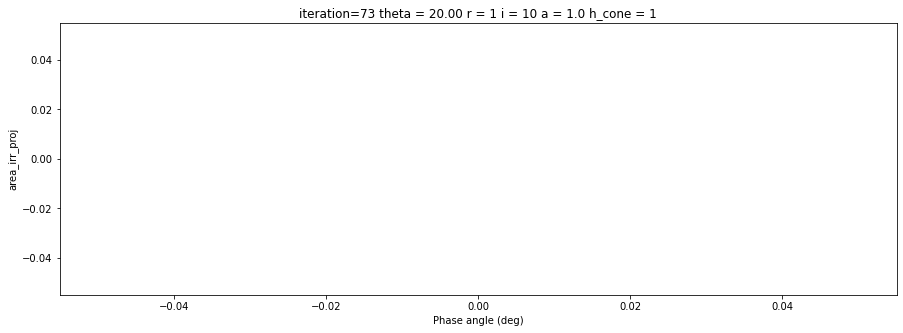

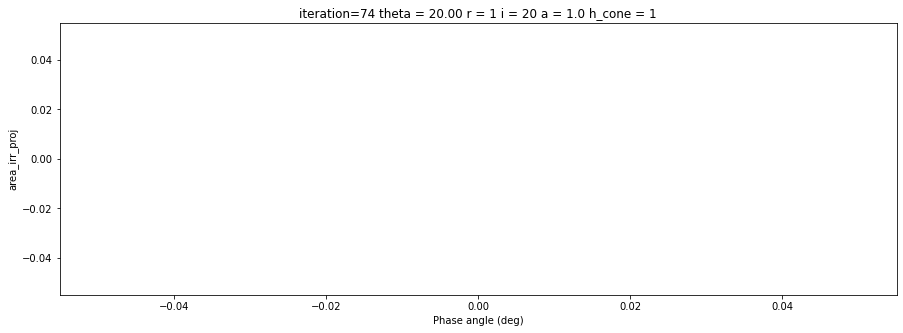

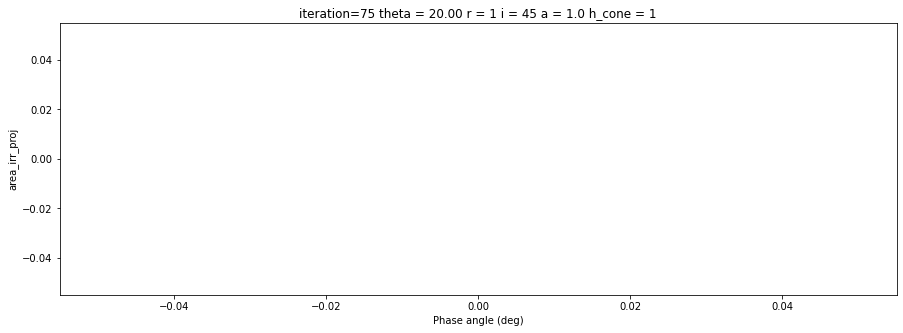

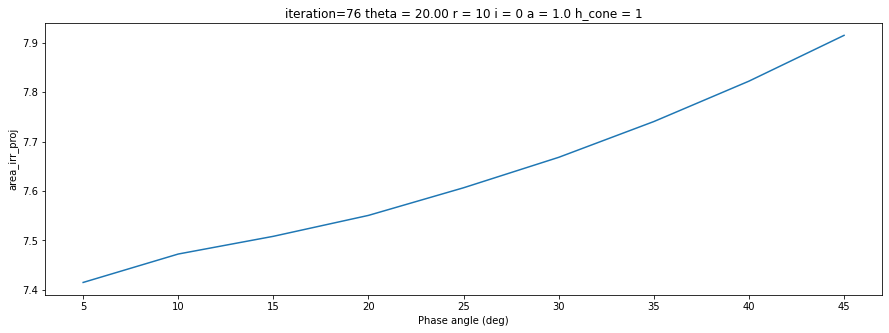

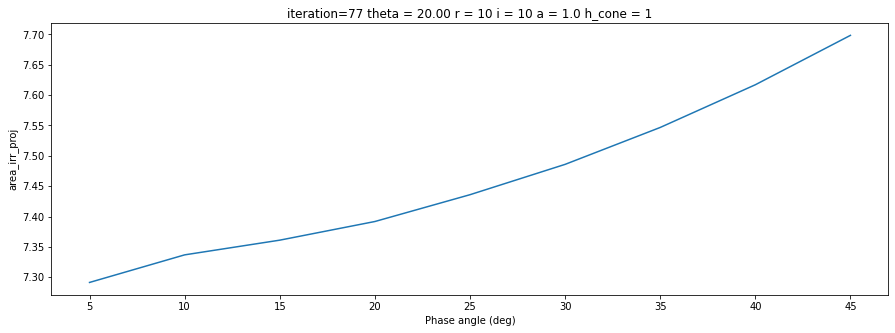

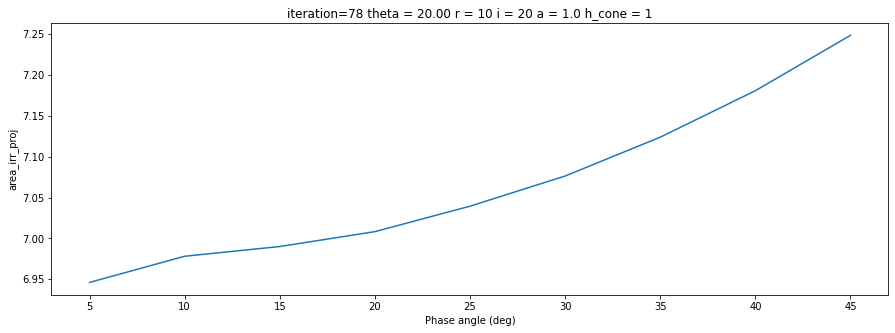

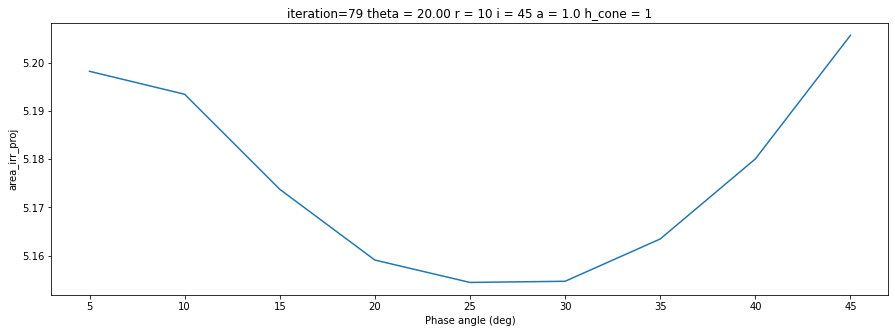

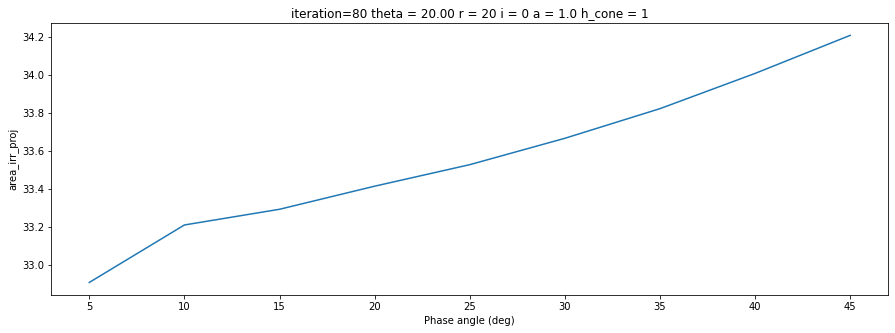

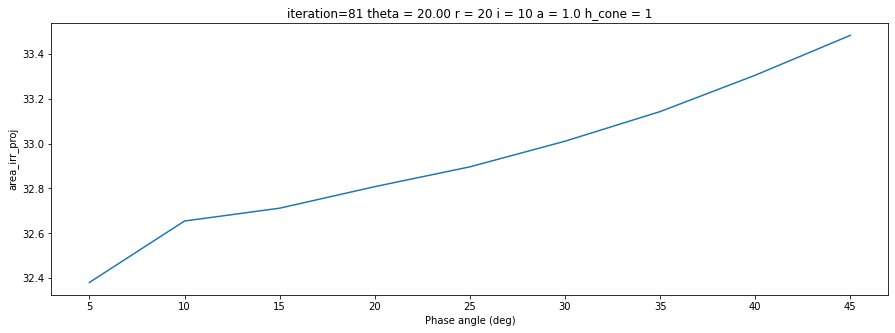

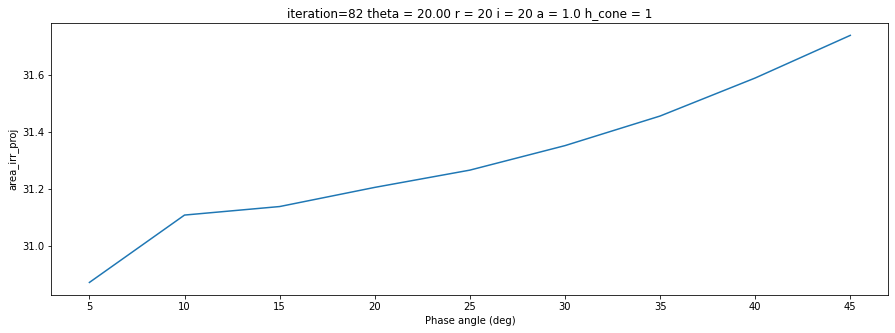

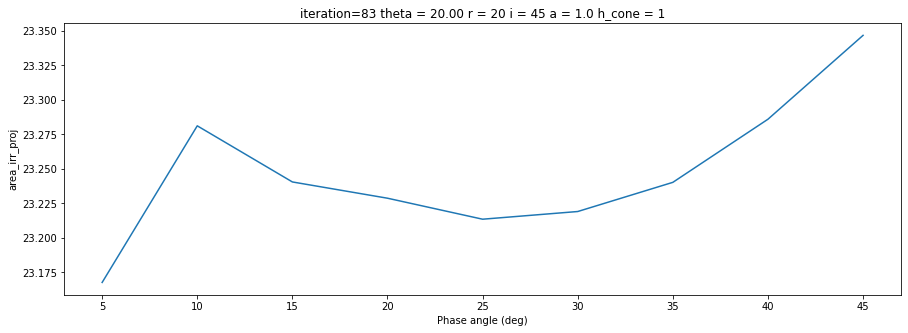

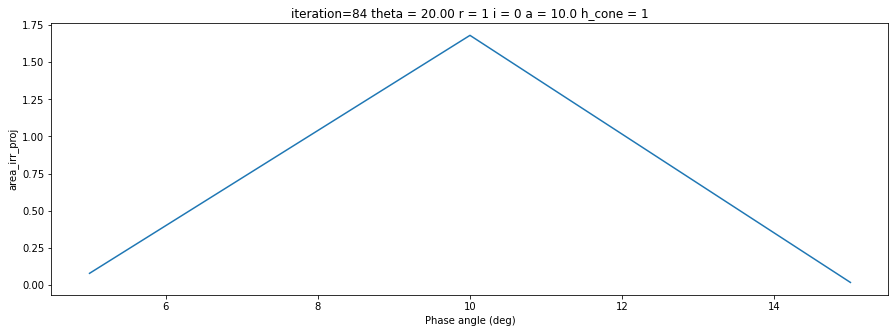

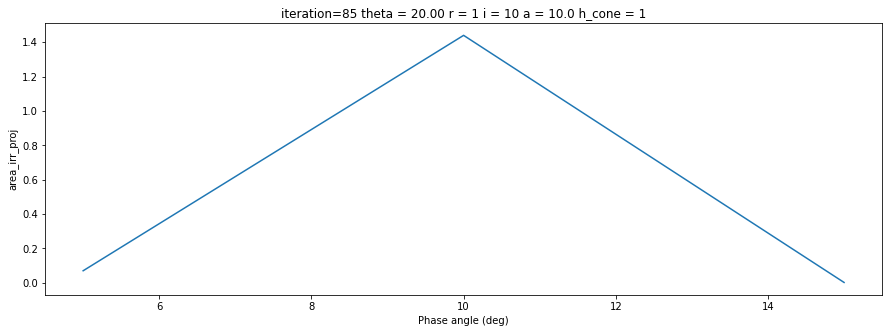

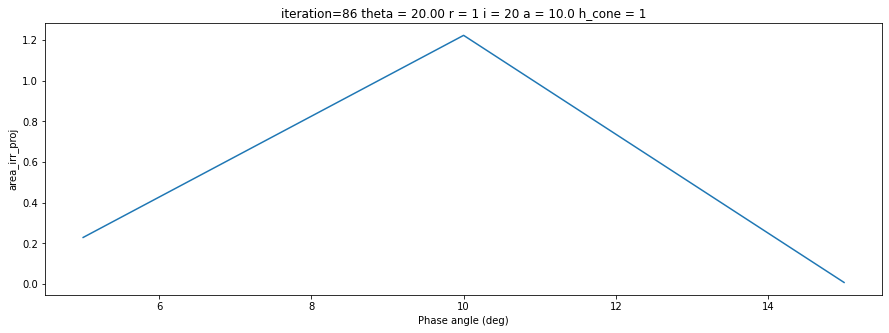

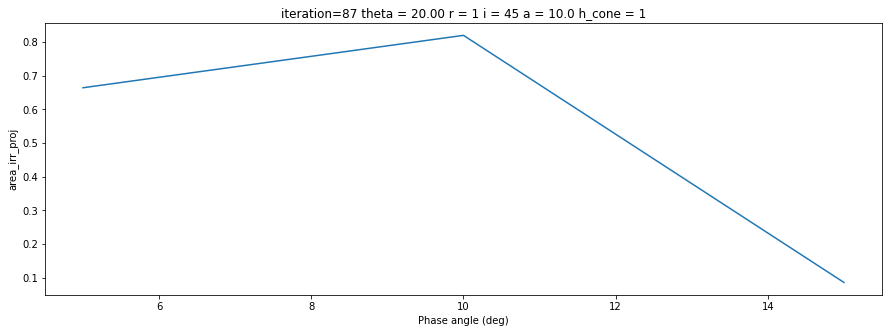

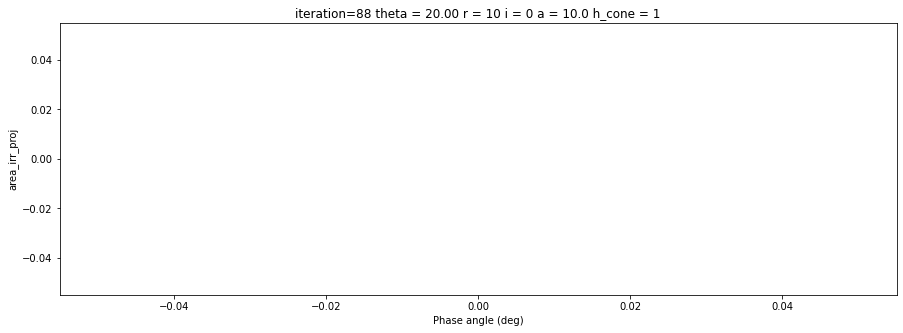

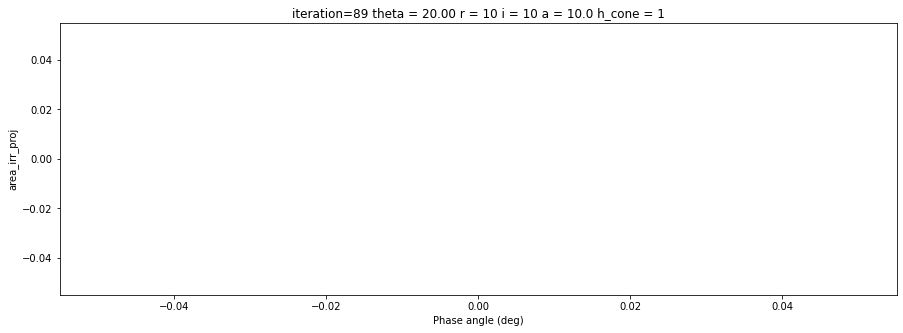

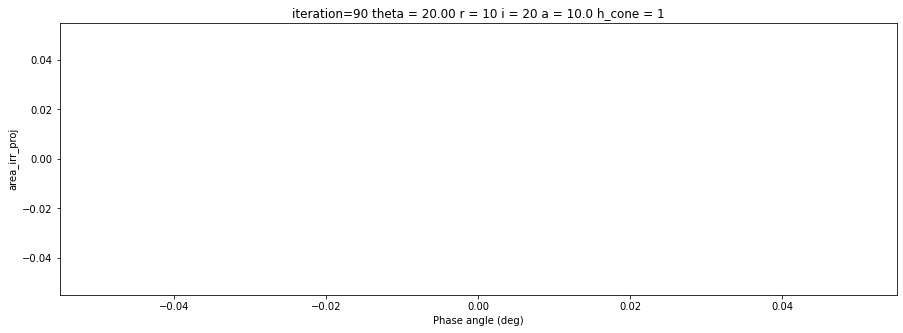

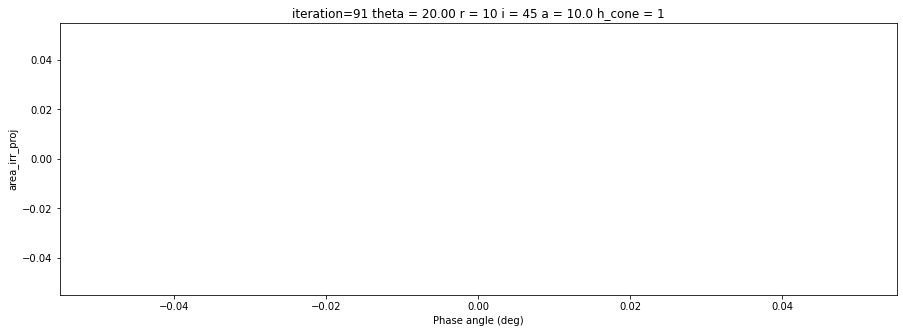

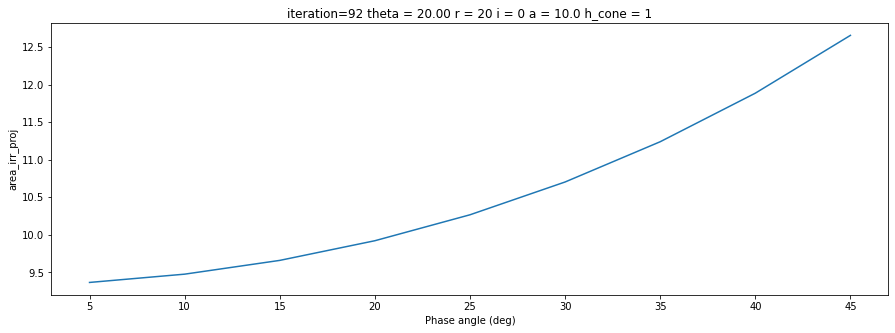

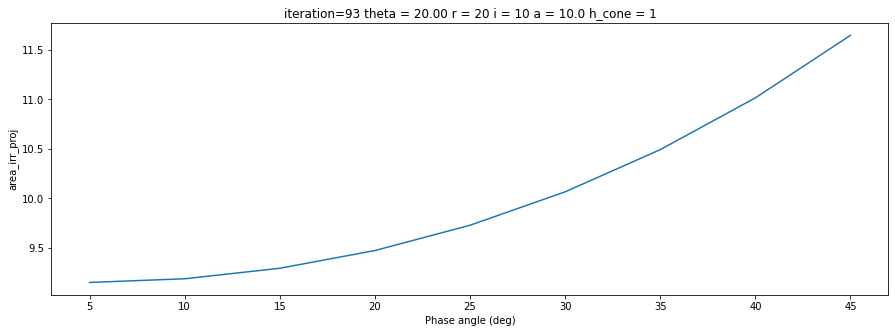

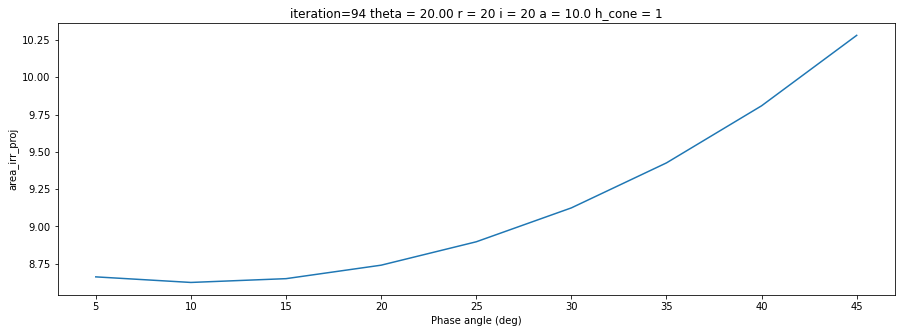

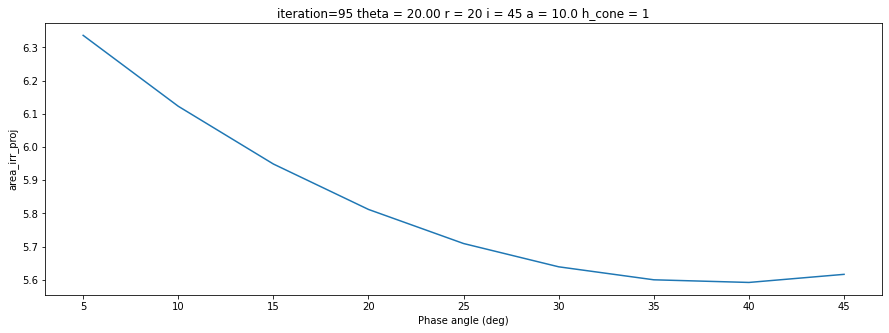

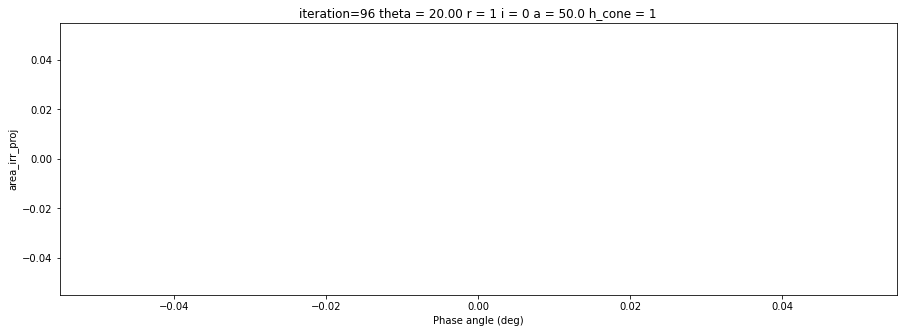

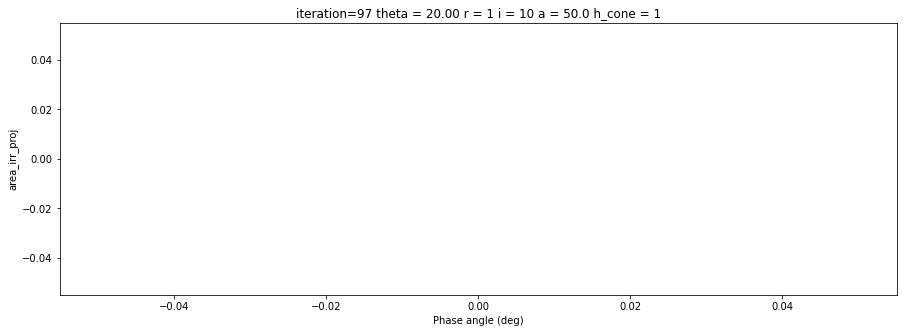

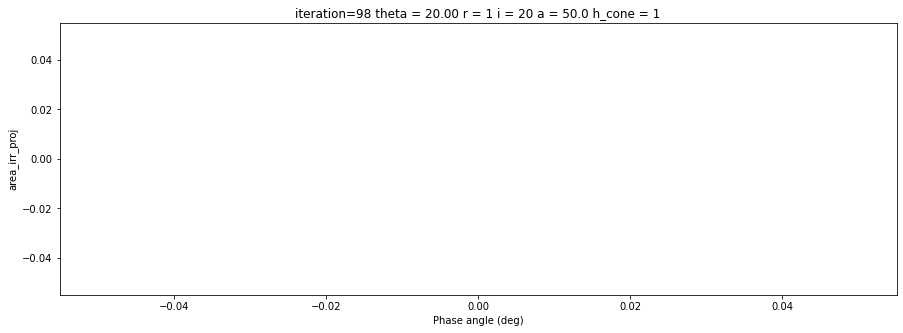

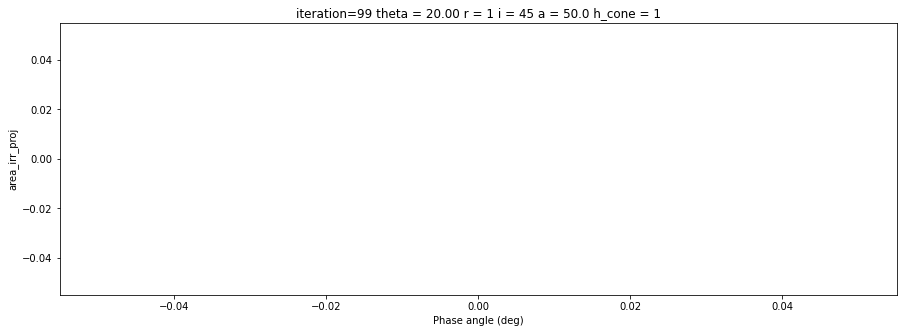

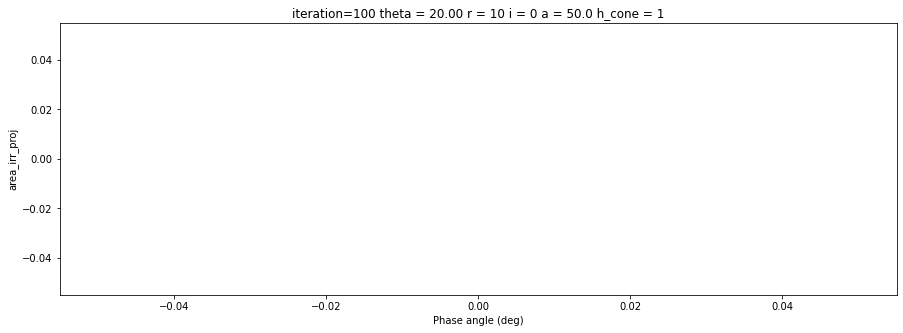

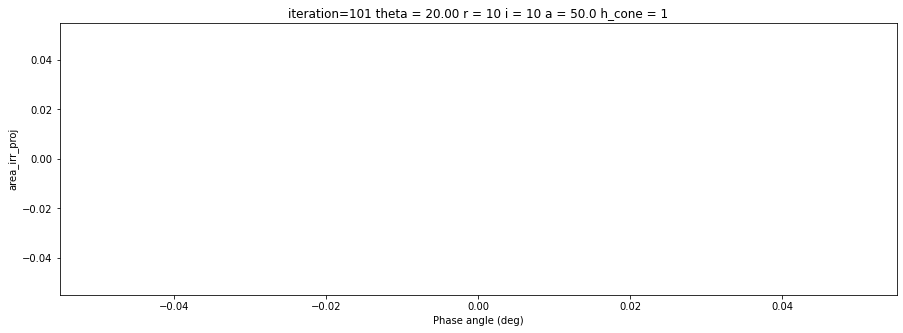

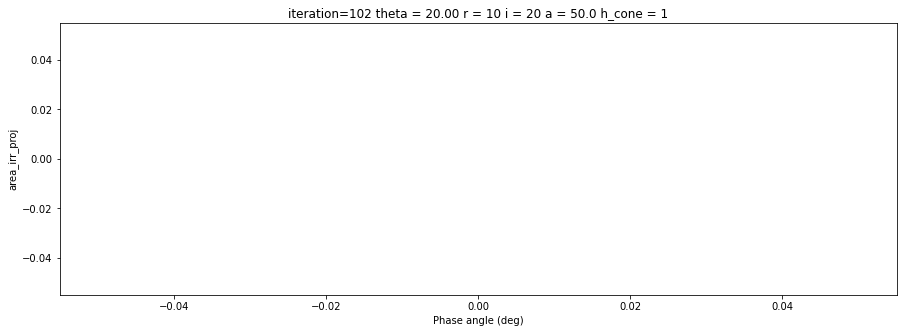

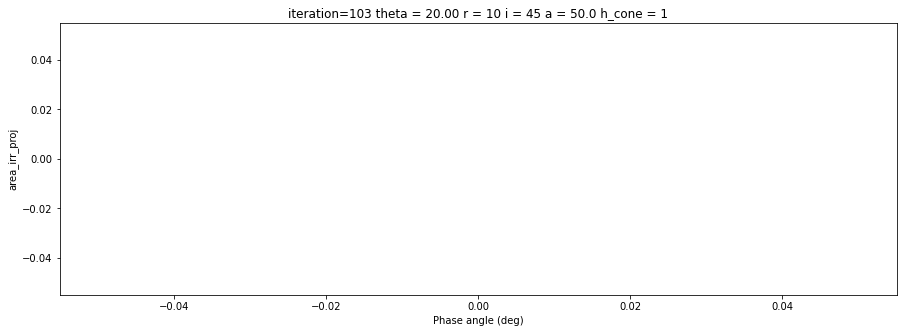

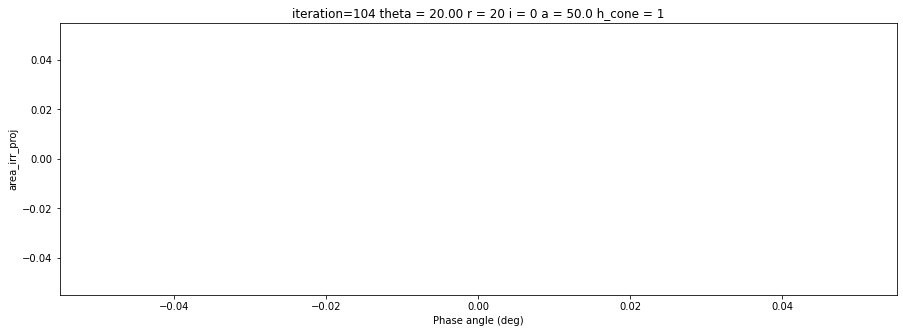

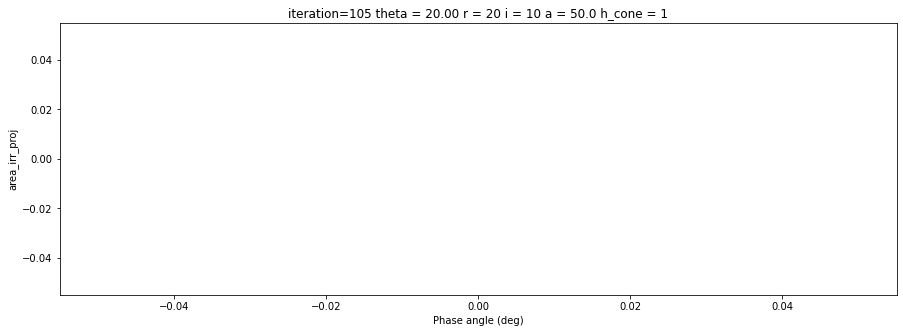

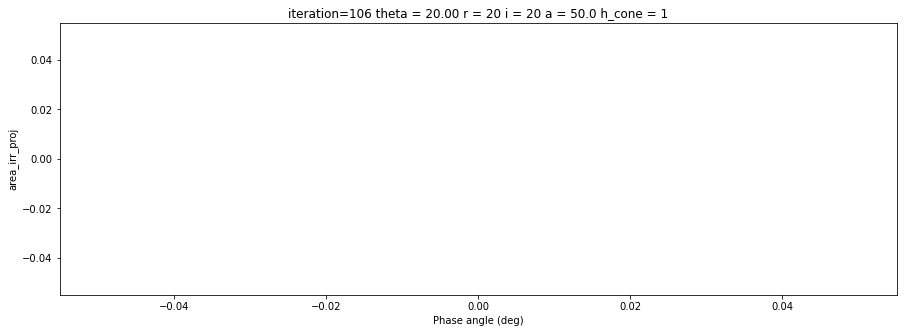

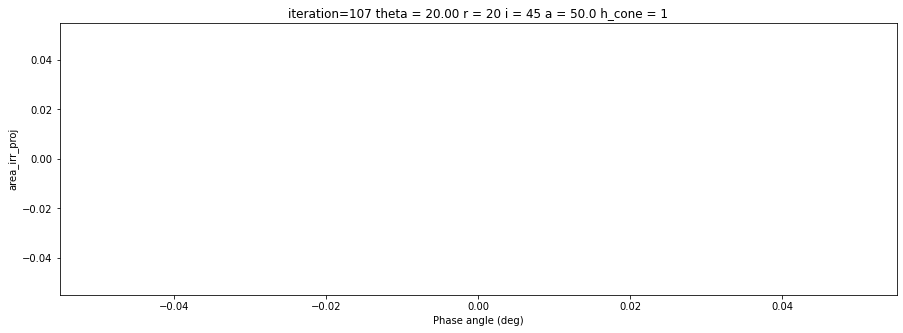

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1080x360 with 0 Axes>

In [7]:
for i in range(145):
    plt.figure(figsize=(15,5))
    sub = df[df['iteration'] == i]
    theta = sub['theta'].unique()[0]
    r = sub['r'].unique()[0]
    incl = sub['i'].unique()[0]
    a = sub['a'].unique()[0]
    h_cone = sub['h_cone'].unique()[0]
    plt.title(f'iteration={i} theta = {np.rad2deg(theta):.2f} r = {r} i = {incl} a = {a} h_cone = {h_cone}')
    plt.plot(sub['phase_ang'], sub['area_irr_proj'].abs(), label=i)
    plt.xlabel('Phase angle (deg)')
    plt.ylabel('area_irr_proj')
    plt.show()

In [ ]:
sub = df[df['iteration'] == 145]
sub['a']

In [ ]:
for i in range(145):
    plt.figure(figsize=(15,5))
    sub = df[df['iteration'] == i]
    theta = sub['theta'].unique()[0]
    r = sub['r'].unique()[0]
    incl = sub['i'].unique()[0]
    a = sub['a'].unique()[0]
    h_cone = sub['h_cone'].unique()[0]
    plt.title(f'iteration={i} theta = {np.rad2deg(theta):.2f} r = {r} i = {incl} a = {a} h_cone = {h_cone}')
    plt.plot(sub['phase_ang'], sub['area_ratio_cone_irr_proj'].abs(), label=i)
    plt.xlabel('Phase angle (deg)')
    plt.ylabel('area_ratio_cone_irr_proj')
    plt.show()

In [ ]:
sub

In [ ]:
xs_rect = np.concatenate([np.linspace(0,10,100), [10]*100, np.linspace(10,0,100), [0]*100])
ys_rect = np.concatenate([[0]*100, np.linspace(0,10,100),  [10]*100, np.linspace(10,0,100)])

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(xs_rect, ys_rect)

In [ ]:
from skspatial.measurement import area_signed

In [ ]:
area_signed(np.column_stack([xs_rect, ys_rect]))